# Multiple Linear Regression & Logistic Regression (Binary Classifier)

Welcome to Module 3! This notebook covers two fundamental machine learning techniques that extend beyond simple linear regression.

## Learning Objectives

By the end of this notebook, you will understand:

### Multiple Linear Regression:
- Differences between simple and multiple linear regression
- How to handle multicollinearity issues
- Methods for dealing with categorical variables
- Model assessment and comparison techniques

### Logistic Regression (Binary Classifier):
- Introduction to feature selection concepts
- Understanding univariate logistic regression
- The mathematics and visualization of the sigmoid curve
- Finding the best fit sigmoid curve for classification

Let's begin our journey into these powerful machine learning techniques!

# Part 1: Multiple Linear Regression

## Simple Linear Regression vs Multiple Linear Regression

Understanding the key differences between these two approaches is crucial for choosing the right modeling technique.

### Simple Linear Regression
- **Definition**: Models the relationship between **one** independent variable (predictor) and **one** dependent variable (target)
- **Equation**: `Y = β₀ + β₁X + ε`
- **Purpose**: Understand the linear relationship between two variables
- **Limitations**: 
  - Only considers one predictor variable
  - May miss important relationships with other variables
  - Often oversimplifies real-world scenarios

### Multiple Linear Regression
- **Definition**: Models the relationship between **multiple** independent variables (predictors) and **one** dependent variable (target)
- **Equation**: `Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ + ε`
- **Purpose**: Understand how multiple factors simultaneously influence the target variable
- **Advantages**:
  - More realistic representation of real-world relationships
  - Better predictive accuracy
  - Can control for confounding variables
  - Provides insights into relative importance of different predictors

### Key Differences Comparison

| Aspect | Simple Linear Regression | Multiple Linear Regression |
|--------|-------------------------|---------------------------|
| **Number of Predictors** | 1 | 2 or more |
| **Model Complexity** | Low | Higher |
| **Interpretability** | Very High | Moderate to High |
| **Predictive Power** | Limited | Generally Better |
| **Assumptions** | Fewer complications | More complex assumption checking |
| **Visualization** | 2D scatter plot | Multiple dimensions (harder to visualize) |
| **Real-world Applicability** | Limited scenarios | Most practical scenarios |

### When to Use Each:

**Simple Linear Regression:**
- Exploring basic relationships
- Educational purposes
- When only one predictor is relevant
- Baseline model for comparison

**Multiple Linear Regression:**
- Real-world prediction problems
- When multiple factors influence the outcome
- Need to control for confounding variables
- Business decision-making scenarios

## Understanding Multicollinearity

**Multicollinearity** occurs when two or more independent variables in a multiple regression model are highly correlated with each other. This can significantly impact the reliability and interpretability of your model.

### What is Multicollinearity?

Multicollinearity means that one predictor variable can be linearly predicted from others with a substantial degree of accuracy. In other words, some of your independent variables are providing redundant information.

### Types of Multicollinearity:

#### 1. **Perfect Multicollinearity**
- One variable is an exact linear combination of others
- **Example**: Including both "Age in Years" and "Age in Months" as predictors
- **Result**: Model cannot be estimated (mathematical impossibility)

#### 2. **High Multicollinearity**
- Variables are highly correlated but not perfectly
- **Example**: Height in centimeters and height in inches (correlation ≈ 1.0)
- **Result**: Model can be estimated but with problems

### Problems Caused by Multicollinearity:

#### 1. **Unstable Coefficient Estimates**
- Small changes in data can cause large changes in coefficients
- Coefficients may have unexpected signs or magnitudes

#### 2. **Inflated Standard Errors**
- Larger confidence intervals
- Reduced statistical significance of individual predictors
- Difficult to determine which variables are truly important

#### 3. **Difficult Interpretation**
- Hard to separate the individual effects of correlated predictors
- Coefficients may not represent true relationships

#### 4. **Poor Generalization**
- Model may not perform well on new data
- Overfitting to specific correlations in training data

### Detecting Multicollinearity:

#### 1. **Correlation Matrix**
- **Threshold**: |correlation| > 0.8 or 0.9 indicates potential issues
- **Limitation**: Only detects pairwise correlations

#### 2. **Variance Inflation Factor (VIF)**
- **Formula**: VIF = 1 / (1 - R²)
- **Interpretation**:
  - VIF = 1: No correlation with other variables
  - VIF > 5: Moderate multicollinearity
  - VIF > 10: High multicollinearity (serious concern)

#### 3. **Condition Index**
- Based on eigenvalues of correlation matrix
- **Interpretation**:
  - < 15: No problem
  - 15-30: Moderate multicollinearity
  - > 30: Severe multicollinearity

### Dealing with Multicollinearity:

#### 1. **Remove Redundant Variables**
- Drop one of the highly correlated variables
- Keep the most theoretically important or interpretable variable

#### 2. **Combine Variables**
- Create composite indices or ratios
- **Example**: Instead of height and weight separately, use BMI

#### 3. **Principal Component Analysis (PCA)**
- Transform correlated variables into uncorrelated components
- **Trade-off**: Lose interpretability

#### 4. **Ridge Regression**
- Adds penalty term to reduce impact of multicollinearity
- **Trade-off**: Biased estimates but lower variance

#### 5. **Increase Sample Size**
- More data can help stabilize estimates
- **Limitation**: Doesn't solve the fundamental problem

### Important Notes:

- **Multicollinearity doesn't affect prediction accuracy** if the same correlations exist in new data
- **It primarily affects interpretation** of individual coefficients
- **Perfect prediction** can still be achieved with multicollinear variables
- **Domain knowledge** is crucial in deciding which variables to keep or remove

## Dealing with Categorical Variables

Linear regression models require numerical inputs, but real-world datasets often contain categorical variables. Here's how to handle them effectively.

### Types of Categorical Variables:

#### 1. **Nominal Variables**
- **Definition**: Categories with no inherent order or ranking
- **Examples**: Color (Red, Blue, Green), Country (USA, Canada, Mexico), Gender (Male, Female)
- **Characteristic**: No mathematical relationship between categories

#### 2. **Ordinal Variables**
- **Definition**: Categories with a natural order or ranking
- **Examples**: Education Level (High School, Bachelor's, Master's, PhD), Rating (Poor, Fair, Good, Excellent)
- **Characteristic**: Order matters, but distances between categories may not be equal

### Encoding Techniques:

#### 1. **One-Hot Encoding (Dummy Variables)**

**Best for**: Nominal variables

**How it works**:
- Create binary (0/1) variables for each category
- If you have k categories, create k-1 dummy variables (to avoid multicollinearity)
- The omitted category becomes the reference category

**Example**: Color variable with categories [Red, Blue, Green]
```
Original Data:    After One-Hot Encoding:
Color            Color_Blue  Color_Green  (Red is reference)
Red         →         0          0
Blue        →         1          0  
Green       →         0          1
```

**Advantages**:
- No assumptions about relationships between categories
- Most widely used and understood
- Works well with linear regression

**Disadvantages**:
- Increases dimensionality (curse of dimensionality)
- Can create sparse matrices with many categories

#### 2. **Label Encoding (Ordinal Encoding)**

**Best for**: Ordinal variables where order matters

**How it works**:
- Assign integer values to categories based on their natural order
- Preserve the ordinal relationship

**Example**: Education Level
```
Original Data:        After Label Encoding:
Education            Education_Encoded
High School     →           1
Bachelor's      →           2
Master's        →           3
PhD             →           4
```

**Advantages**:
- Preserves ordinal information
- Doesn't increase dimensionality
- Simple to implement

**Disadvantages**:
- Assumes equal distances between categories
- Not suitable for nominal variables
- May introduce unintended linear relationships

#### 3. **Binary Encoding**

**Best for**: High-cardinality nominal variables

**How it works**:
- Assign unique integer to each category
- Convert integers to binary representation
- Each binary digit becomes a feature

**Example**: Country variable with 8 categories
```
Country     →  Integer  →  Binary   →  Bit1  Bit2  Bit3
USA         →     1      →   001     →    0     0     1
Canada      →     2      →   010     →    0     1     0
Mexico      →     3      →   011     →    0     1     1
...
```

**Advantages**:
- Reduces dimensionality compared to one-hot encoding
- Good for high-cardinality variables

**Disadvantages**:
- Less interpretable
- May create unintended relationships between categories

### Best Practices:

#### 1. **Choosing the Right Encoding**
- **Nominal variables with few categories (< 10)**: One-hot encoding
- **Nominal variables with many categories (> 10)**: Consider binary encoding or target encoding
- **Ordinal variables**: Label encoding or ordinal encoding
- **High-cardinality variables**: Target encoding, binary encoding, or feature hashing

#### 2. **Handling the Reference Category**
- Choose a meaningful reference category (often the most common or a logical baseline)
- Be consistent across training and test sets
- Document which category is the reference for interpretation

#### 3. **Avoiding Common Pitfalls**
- **Dummy Variable Trap**: Always drop one category to avoid perfect multicollinearity
- **Consistent Encoding**: Ensure the same encoding is applied to training and test sets
- **New Categories**: Have a strategy for handling unseen categories in test data

#### 4. **Feature Engineering with Categories**
- **Interaction Terms**: Create interactions between categorical and numerical variables
- **Grouping**: Combine rare categories into an "Other" category
- **Domain Knowledge**: Use business understanding to create meaningful categories

### Advanced Techniques:

#### 1. **Target Encoding (Mean Encoding)**
- Replace categories with the mean target value for that category
- **Risk**: Can cause overfitting, especially with small categories

#### 2. **Effect Coding**
- Similar to dummy coding but uses -1 instead of 0 for the reference category
- **Advantage**: Coefficients represent deviations from the grand mean

#### 3. **Helmert Coding**
- Each category is compared to the mean of all subsequent categories
- **Use case**: When you want to compare each level to those that follow

### Example Implementation Strategy:

```python
# Typical workflow for categorical variables
1. Identify categorical variables in your dataset
2. Determine if they are nominal or ordinal
3. Choose appropriate encoding method
4. Apply encoding consistently to train/test sets
5. Check for multicollinearity after encoding
6. Validate model performance and interpretability
```

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error, 
                           classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")
print("\nLibrary Versions:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print("Scikit-learn: Available")
print("Ready to begin Multiple Linear Regression analysis!")

Libraries imported successfully!

Library Versions:
NumPy: 2.3.4
Pandas: 2.3.3
Matplotlib: 3.10.7
Seaborn: 0.13.2
Scikit-learn: Available
Ready to begin Multiple Linear Regression analysis!


In [6]:
# Load California Housing Dataset for Multiple Linear Regression
print("Loading California Housing Dataset for Multiple Linear Regression")
print("=" * 70)

# Load the dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

print("Dataset Information:")
print(f"Shape: {housing_df.shape}")
print(f"Features: {list(housing.feature_names)}")
print(f"Target: Median house value (in hundreds of thousands of dollars)")

print(f"\nDataset Description:")
print(housing.DESCR[:600] + "...")

# Display basic information
print(f"\n" + "=" * 70)
print("First 5 rows:")
print(housing_df.head())

print(f"\n" + "=" * 70)
print("Statistical Summary:")
print(housing_df.describe())

print(f"\n" + "=" * 70)
print("Missing Values Check:")
missing_values = housing_df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")

print(f"\n" + "=" * 70)
print("Data Types:")
print(housing_df.dtypes)

Loading California Housing Dataset for Multiple Linear Regression
Dataset Information:
Shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: Median house value (in hundreds of thousands of dollars)

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latit...

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8

Correlation Analysis:
Correlation with target variable (sorted):
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


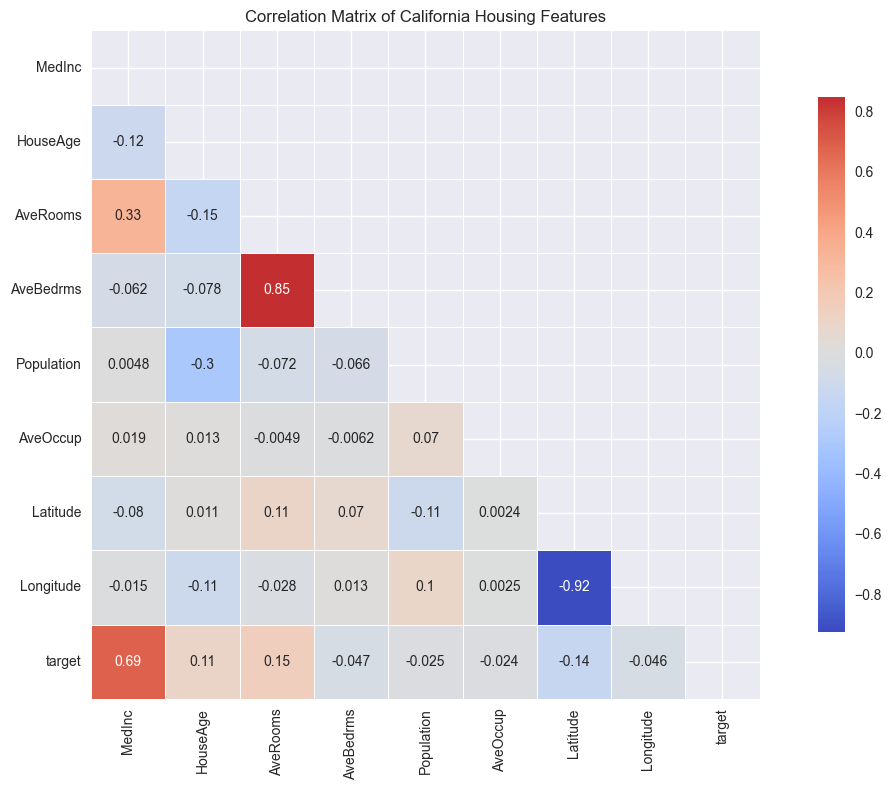


Checking for Multicollinearity:
High correlations between features (|correlation| > 0.7):
  AveRooms - AveBedrms: 0.848
  Latitude - Longitude: -0.925

Variance Inflation Factor (VIF) Analysis:
(VIF > 5: Moderate multicollinearity, VIF > 10: High multicollinearity)
      Feature         VIF
7   Longitude  633.711654
6    Latitude  559.874071
2    AveRooms   45.993601
3   AveBedrms   43.590314
0      MedInc   11.511140
1    HouseAge    7.195917
4  Population    2.935745
5    AveOccup    1.095243

VIF Interpretation:
  Longitude: HIGH multicollinearity (concerning)
  Latitude: HIGH multicollinearity (concerning)
  AveRooms: HIGH multicollinearity (concerning)
  AveBedrms: HIGH multicollinearity (concerning)
  MedInc: HIGH multicollinearity (concerning)
  HouseAge: MODERATE multicollinearity
  Population: No significant multicollinearity
  AveOccup: No significant multicollinearity


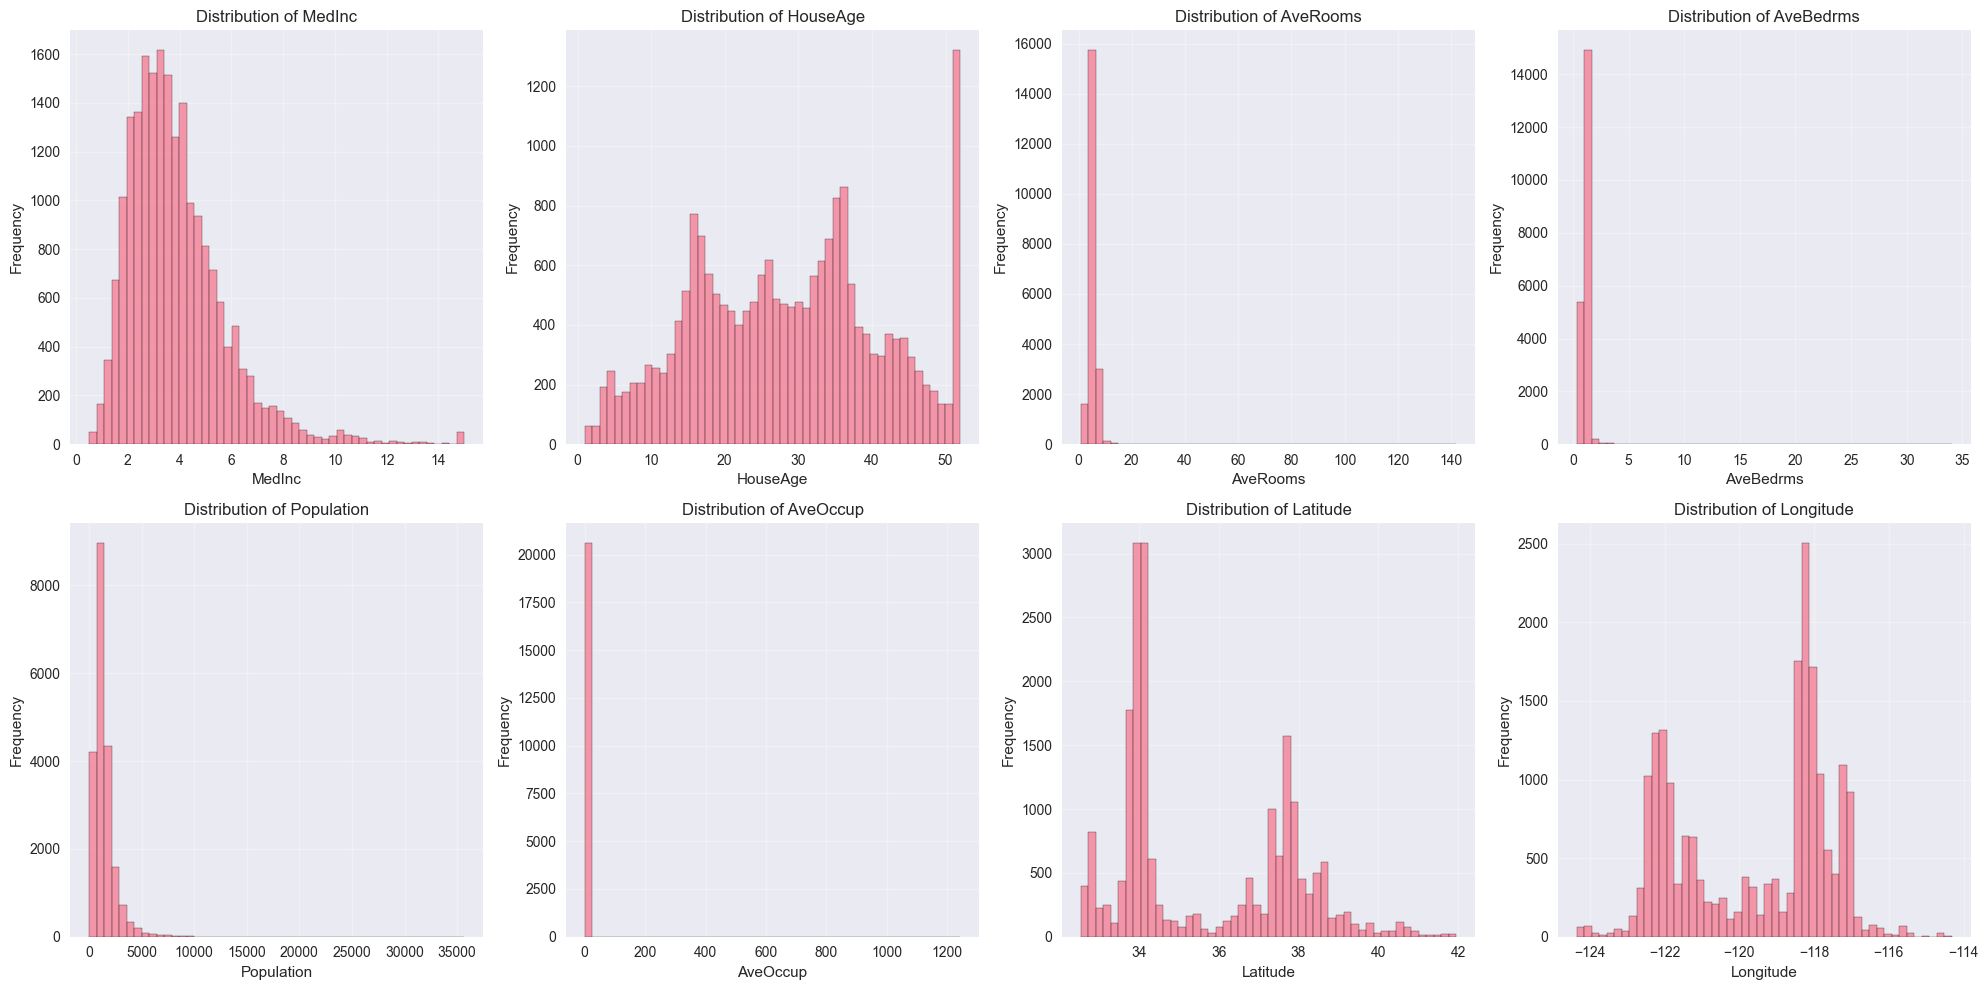

In [7]:
# Exploratory Data Analysis and Multicollinearity Check

# Calculate correlation matrix
correlation_matrix = housing_df.corr()

print("Correlation Analysis:")
print("=" * 50)
print("Correlation with target variable (sorted):")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of California Housing Features')
plt.tight_layout()
plt.show()

# Check for high correlations between features (potential multicollinearity)
print(f"\n" + "=" * 50)
print("Checking for Multicollinearity:")
print("High correlations between features (|correlation| > 0.7):")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_val))
            print(f"  {feature1} - {feature2}: {corr_val:.3f}")

if not high_corr_pairs:
    print("  No high correlations found between features.")

# Calculate Variance Inflation Factor (VIF)
print(f"\n" + "=" * 50)
print("Variance Inflation Factor (VIF) Analysis:")
print("(VIF > 5: Moderate multicollinearity, VIF > 10: High multicollinearity)")

# Prepare features for VIF calculation (excluding target)
X_features = housing_df.drop('target', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_features.columns
vif_data["VIF"] = [variance_inflation_factor(X_features.values, i) 
                   for i in range(len(X_features.columns))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print(vif_data)

# Interpret VIF results
print(f"\nVIF Interpretation:")
for _, row in vif_data.iterrows():
    if row['VIF'] > 10:
        status = "HIGH multicollinearity (concerning)"
    elif row['VIF'] > 5:
        status = "MODERATE multicollinearity"
    else:
        status = "No significant multicollinearity"
    print(f"  {row['Feature']}: {status}")

# Distribution plots for key features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = X_features.columns
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(housing_df[feature], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Implementing Multiple Linear Regression

print("Multiple Linear Regression Implementation")
print("=" * 50)

# Prepare features and target
X = housing_df.drop('target', axis=1)
y = housing_df['target']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Create and fit the multiple linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

print(f"\n" + "=" * 50)
print("Model Coefficients and Interpretation:")
print("=" * 50)

# Display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_,
    'Abs_Coefficient': np.abs(mlr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"Intercept (β₀): {mlr_model.intercept_:.4f}")
print(f"\nCoefficients (β₁, β₂, ..., βₚ):")
for _, row in coefficients_df.iterrows():
    print(f"  {row['Feature']:<15}: {row['Coefficient']:>8.4f}")

print(f"\n" + "=" * 50)
print("Model Equation:")
print("=" * 50)
equation = f"House_Value = {mlr_model.intercept_:.3f}"
for _, row in coefficients_df.iterrows():
    equation += f" + ({row['Coefficient']:.3f} × {row['Feature']})"
print(f"House_Value = {mlr_model.intercept_:.3f}")
for _, row in coefficients_df.iterrows():
    sign = "+" if row['Coefficient'] >= 0 else ""
    print(f"              {sign}{row['Coefficient']:.3f} × {row['Feature']}")

print(f"\n" + "=" * 50)
print("Coefficient Interpretation:")
print("=" * 50)
print("(All else being equal, a 1-unit increase in each feature affects house value by:)")
for _, row in coefficients_df.iterrows():
    impact = row['Coefficient'] * 100  # Convert to thousands of dollars
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {row['Feature']:<15}: {direction} house value by ${abs(impact):,.0f}k")

Multiple Linear Regression Implementation
Features (X) shape: (20640, 8)
Target (y) shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Data Split:
Training set: 16512 samples
Testing set: 4128 samples

Model Coefficients and Interpretation:
Intercept (β₀): -37.0233

Coefficients (β₁, β₂, ..., βₚ):
  AveBedrms      :   0.7831
  MedInc         :   0.4487
  Longitude      :  -0.4337
  Latitude       :  -0.4198
  AveRooms       :  -0.1233
  HouseAge       :   0.0097
  AveOccup       :  -0.0035
  Population     :  -0.0000

Model Equation:
House_Value = -37.023
              +0.783 × AveBedrms
              +0.449 × MedInc
              -0.434 × Longitude
              -0.420 × Latitude
              -0.123 × AveRooms
              +0.010 × HouseAge
              -0.004 × AveOccup
              -0.000 × Population

Coefficient Interpretation:
(All else being equal, a 1-unit increase in each feature affects house 

Model Performance Assessment
     Metric  Training Set  Testing Set  Difference
0  R² Score        0.6126       0.5758      0.0368
1       MSE        0.5179       0.5559      0.0380
2      RMSE        0.7197       0.7456      0.0259
3       MAE        0.5286       0.5332      0.0046

Performance Interpretation:
• R² Score: The model explains 57.6% of variance in house values
• RMSE: Average prediction error is $75k
• MAE: On average, predictions are off by $53k
• Overfitting Assessment: No significant overfitting (R² difference: 0.037)
• Cross-validation R² scores: [0.62  0.613 0.613 0.611 0.6  ]
• Mean CV R²: 0.611 (±0.013)

Feature Importance Analysis:
(Based on absolute coefficient values - standardized interpretation)
Feature importance ranking (standardized coefficients):
 1. Latitude       :  -0.897
 2. Longitude      :  -0.870
 3. MedInc         :   0.854
 4. AveBedrms      :   0.339
 5. AveRooms       :  -0.294
 6. HouseAge       :   0.123
 7. AveOccup       :  -0.041
 8. Popul

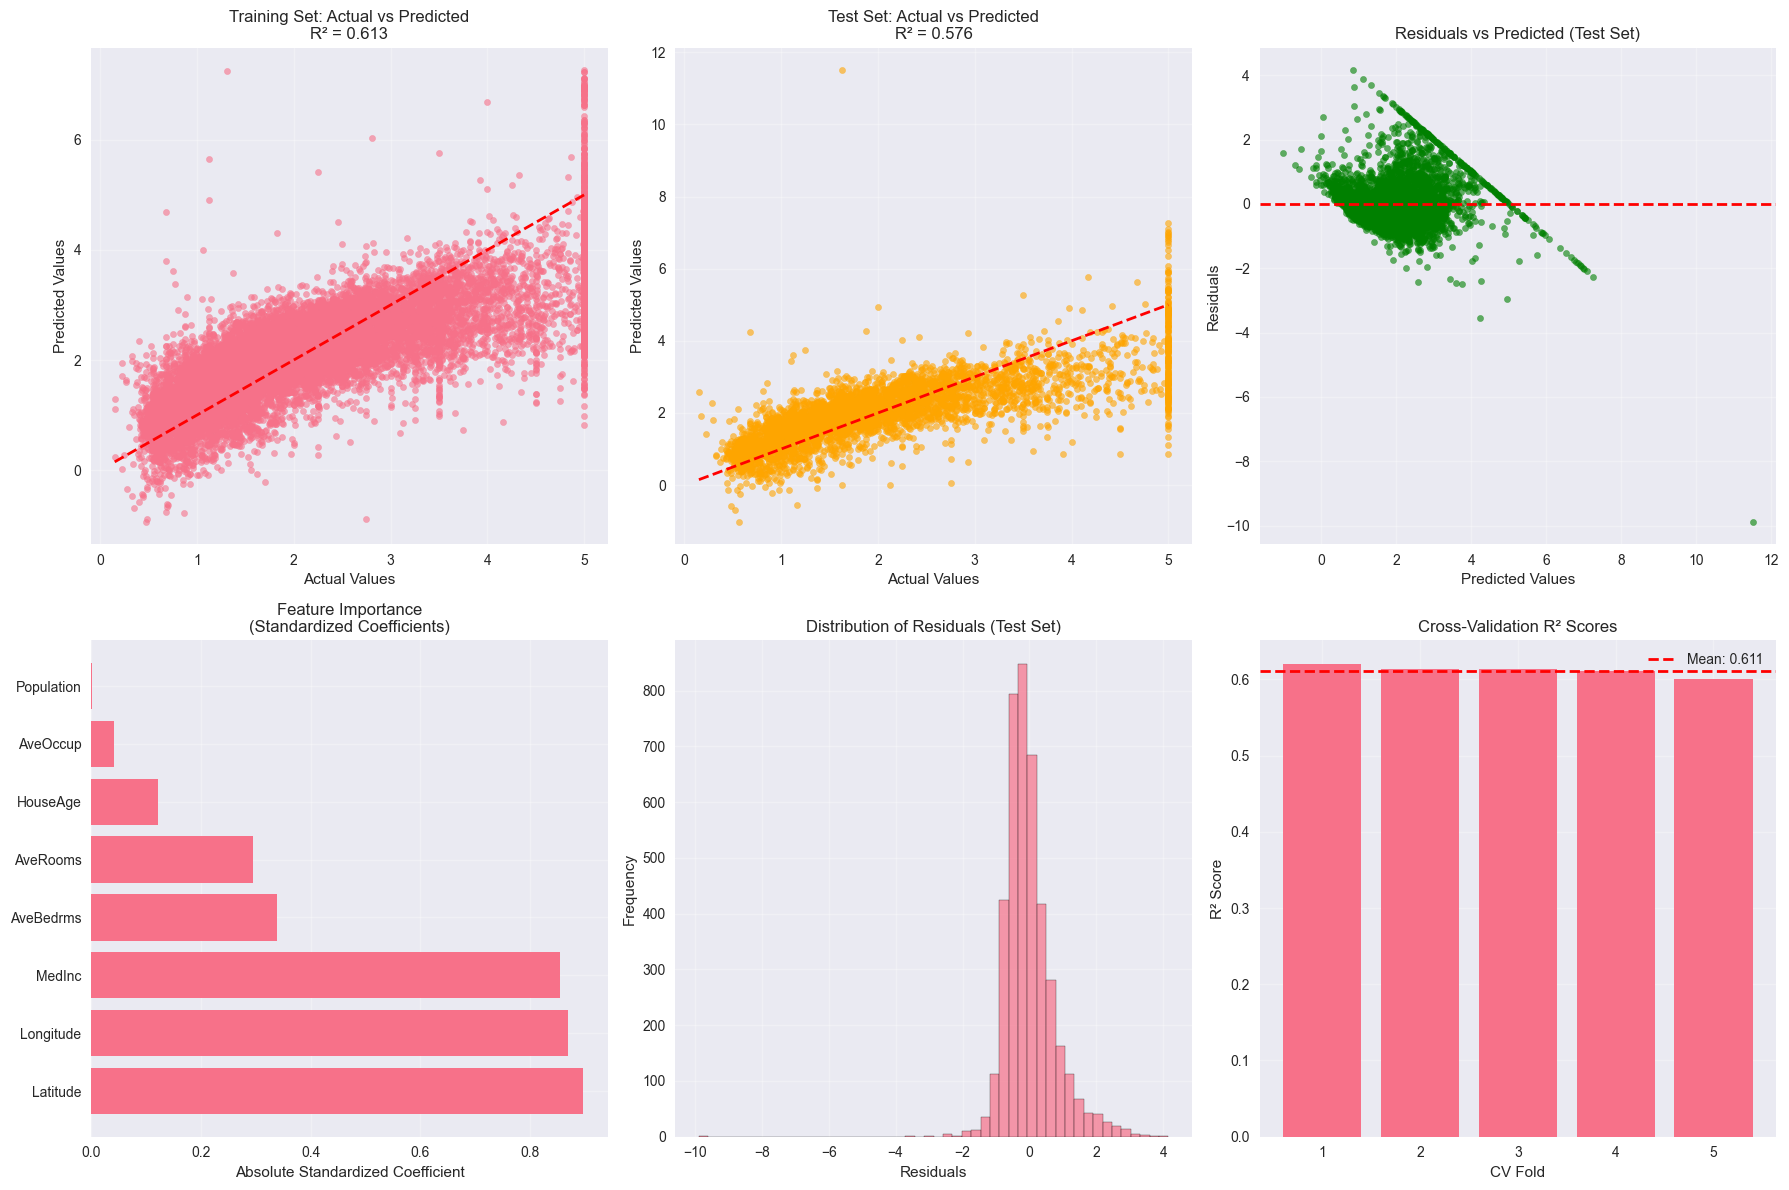


Comparison: Multiple vs Simple Linear Regression
Best single feature for simple regression: MedInc

Performance Comparison:
Model                     R² Score   RMSE       Improvement
-------------------------------------------------------
Simple Linear Regression  0.459      0.842      Baseline
Multiple Linear Regression 0.576      0.746      + 25.5%

Key Improvements with Multiple Linear Regression:
• R² improvement: 0.117 (+25.5%)
• RMSE improvement: $10k (+11.5%)
• Additional variance explained: 11.7 percentage points


In [9]:
# Model Assessment and Comparison

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Model Performance Assessment")
print("=" * 60)

# Create performance comparison table
performance_df = pd.DataFrame({
    'Metric': ['R² Score', 'MSE', 'RMSE', 'MAE'],
    'Training Set': [train_r2, train_mse, train_rmse, train_mae],
    'Testing Set': [test_r2, test_mse, test_rmse, test_mae],
    'Difference': [abs(train_r2 - test_r2), abs(train_mse - test_mse), 
                   abs(train_rmse - test_rmse), abs(train_mae - test_mae)]
})

print(performance_df.round(4))

# Interpretation of metrics
print(f"\n" + "=" * 60)
print("Performance Interpretation:")
print("=" * 60)
print(f"• R² Score: The model explains {test_r2*100:.1f}% of variance in house values")
print(f"• RMSE: Average prediction error is ${test_rmse*100:.0f}k")
print(f"• MAE: On average, predictions are off by ${test_mae*100:.0f}k")

# Assess overfitting
r2_diff = abs(train_r2 - test_r2)
if r2_diff < 0.05:
    overfitting_status = "No significant overfitting"
elif r2_diff < 0.1:
    overfitting_status = "Mild overfitting"
else:
    overfitting_status = "Potential overfitting"

print(f"• Overfitting Assessment: {overfitting_status} (R² difference: {r2_diff:.3f})")

# Cross-validation for more robust performance estimate
cv_scores = cross_val_score(mlr_model, X_train, y_train, cv=5, scoring='r2')
print(f"• Cross-validation R² scores: {cv_scores.round(3)}")
print(f"• Mean CV R²: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")

# Feature importance based on absolute coefficients
print(f"\n" + "=" * 60)
print("Feature Importance Analysis:")
print("=" * 60)
print("(Based on absolute coefficient values - standardized interpretation)")

# Standardize features to compare coefficient magnitudes fairly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model on standardized data
mlr_scaled = LinearRegression()
mlr_scaled.fit(X_train_scaled, y_train)

# Feature importance based on standardized coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Standardized_Coefficient': mlr_scaled.coef_,
    'Abs_Std_Coefficient': np.abs(mlr_scaled.coef_)
}).sort_values('Abs_Std_Coefficient', ascending=False)

print("Feature importance ranking (standardized coefficients):")
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<15}: {row['Standardized_Coefficient']:>7.3f}")

# Visualization of results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, s=20, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals vs Predicted (Testing)
test_residuals = y_test - y_test_pred
axes[0, 2].scatter(y_test_pred, test_residuals, alpha=0.6, s=20, color='green')
axes[0, 2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Predicted Values')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Residuals vs Predicted (Test Set)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Feature Importance
top_features = feature_importance.head(8)
axes[1, 0].barh(top_features['Feature'], top_features['Abs_Std_Coefficient'])
axes[1, 0].set_xlabel('Absolute Standardized Coefficient')
axes[1, 0].set_title('Feature Importance\n(Standardized Coefficients)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Residual Distribution
axes[1, 1].hist(test_residuals, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals (Test Set)')
axes[1, 1].grid(True, alpha=0.3)

# 6. Cross-validation scores
axes[1, 2].bar(range(1, 6), cv_scores)
axes[1, 2].axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.3f}')
axes[1, 2].set_xlabel('CV Fold')
axes[1, 2].set_ylabel('R² Score')
axes[1, 2].set_title('Cross-Validation R² Scores')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with Simple Linear Regression (using best single feature)
print(f"\n" + "=" * 60)
print("Comparison: Multiple vs Simple Linear Regression")
print("=" * 60)

# Use the feature with highest correlation with target
best_feature = target_corr.drop('target').index[0]
print(f"Best single feature for simple regression: {best_feature}")

# Simple linear regression with best feature
X_simple = X_train[[best_feature]]
X_simple_test = X_test[[best_feature]]

simple_model = LinearRegression()
simple_model.fit(X_simple, y_train)
y_simple_pred = simple_model.predict(X_simple_test)
simple_r2 = r2_score(y_test, y_simple_pred)
simple_rmse = np.sqrt(mean_squared_error(y_test, y_simple_pred))

print(f"\nPerformance Comparison:")
print(f"{'Model':<25} {'R² Score':<10} {'RMSE':<10} {'Improvement'}")
print("-" * 55)
print(f"{'Simple Linear Regression':<25} {simple_r2:<10.3f} {simple_rmse:<10.3f} {'Baseline'}")
print(f"{'Multiple Linear Regression':<25} {test_r2:<10.3f} {test_rmse:<10.3f} {'+' if test_r2 > simple_r2 else ''}{((test_r2 - simple_r2)/simple_r2*100):5.1f}%")

r2_improvement = test_r2 - simple_r2
rmse_improvement = (simple_rmse - test_rmse) / simple_rmse * 100

print(f"\nKey Improvements with Multiple Linear Regression:")
print(f"• R² improvement: {r2_improvement:.3f} ({r2_improvement/simple_r2*100:+.1f}%)")
print(f"• RMSE improvement: ${(simple_rmse - test_rmse)*100:.0f}k ({rmse_improvement:+.1f}%)")
print(f"• Additional variance explained: {r2_improvement*100:.1f} percentage points")

# Part 2: Logistic Regression (Binary Classifier)

## Introduction to Feature Selection

Before diving into logistic regression, it's important to understand **feature selection** - the process of selecting the most relevant features for your model.

### What is Feature Selection?

**Feature selection** is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. It's a crucial step in machine learning that can significantly impact model performance.

### Why is Feature Selection Important?

#### 1. **Improved Model Performance**
- Removes irrelevant and redundant features
- Reduces noise in the data
- Can lead to better accuracy and generalization

#### 2. **Reduced Overfitting**
- Fewer features mean less complexity
- Reduces the curse of dimensionality
- Better generalization to unseen data

#### 3. **Faster Training and Prediction**
- Fewer features = less computational time
- Reduced memory requirements
- Faster model deployment

#### 4. **Better Interpretability**
- Easier to understand and explain the model
- Focus on the most important predictive factors
- Clearer business insights

### Types of Feature Selection:

#### 1. **Filter Methods**
- **Principle**: Evaluate features independently of the model
- **Examples**: Correlation coefficients, Chi-square test, Information gain
- **Pros**: Fast, model-agnostic
- **Cons**: Doesn't consider feature interactions

#### 2. **Wrapper Methods**
- **Principle**: Use a specific model to evaluate feature subsets
- **Examples**: Forward selection, Backward elimination, Recursive Feature Elimination
- **Pros**: Considers feature interactions, model-specific
- **Cons**: Computationally expensive, risk of overfitting

#### 3. **Embedded Methods**
- **Principle**: Feature selection is built into the model training process
- **Examples**: Lasso regression, Ridge regression, Decision trees
- **Pros**: Balances computational efficiency and performance
- **Cons**: Model-specific

### Common Feature Selection Techniques:

#### 1. **Univariate Statistical Tests**
- **For Continuous Targets**: F-statistic, Correlation coefficient
- **For Categorical Targets**: Chi-square test, Mutual information
- **Use Case**: Quick initial feature screening

#### 2. **Correlation-Based Selection**
- Remove highly correlated features (multicollinearity)
- Keep features with high correlation to target, low correlation to each other

#### 3. **Recursive Feature Elimination (RFE)**
- Iteratively removes least important features
- Uses model coefficients or feature importance scores

#### 4. **Regularization Methods**
- **L1 (Lasso)**: Drives some coefficients to exactly zero
- **L2 (Ridge)**: Shrinks coefficients but doesn't eliminate features
- **Elastic Net**: Combines L1 and L2 penalties

### Feature Selection in Practice:

```python
# Typical workflow
1. Initial exploration and basic filtering
2. Statistical significance testing
3. Correlation analysis
4. Model-based selection
5. Cross-validation for final selection
6. Evaluate selected features' performance
```

Feature selection is particularly important in logistic regression because:
- It can improve classification accuracy
- Reduces the risk of overfitting
- Makes the model more interpretable
- Helps identify the most important predictive factors

## Univariate Logistic Regression Binary Classification

**Univariate Logistic Regression** is logistic regression with only one predictor variable. It's an excellent starting point for understanding the fundamentals of logistic regression.

### Key Differences from Linear Regression:

| Aspect | Linear Regression | Logistic Regression |
|--------|------------------|-------------------|
| **Purpose** | Predict continuous values | Predict probabilities/categories |
| **Output Range** | (-∞, +∞) | [0, 1] for probabilities |
| **Function Used** | Linear function | Sigmoid (logistic) function |
| **Assumptions** | Linear relationship | Linear relationship between predictors and log-odds |
| **Error Distribution** | Normal (Gaussian) | Binomial |

### The Problem with Linear Regression for Classification:

1. **Output Range Issue**: Linear regression can predict values outside [0, 1]
2. **Inappropriate Assumptions**: Assumes normal distribution of errors
3. **Linear Decision Boundary**: May not capture the true relationship

## Understanding the Sigmoid Curve

The **sigmoid function** (also called the **logistic function**) is the heart of logistic regression. It transforms any real-valued input into a value between 0 and 1, making it perfect for probability estimation.

### Mathematical Definition:

The sigmoid function is defined as:

**σ(z) = 1 / (1 + e^(-z))**

Where:
- **z = β₀ + β₁x** (linear combination of predictors)
- **e** is the mathematical constant (≈ 2.718)
- **σ(z)** represents the probability that y = 1

### Key Properties of the Sigmoid Curve:

#### 1. **S-Shaped Curve**
- Starts near 0 for very negative z values
- Increases smoothly and continuously
- Approaches 1 for very positive z values
- Has a characteristic "S" shape

#### 2. **Output Range: [0, 1]**
- Always produces values between 0 and 1
- Perfect for probability interpretation
- Maps any real number to a probability

#### 3. **Smooth and Differentiable**
- No sudden jumps or discontinuities
- Allows for gradient-based optimization
- Enables calculus-based parameter estimation

#### 4. **Symmetric Around z = 0**
- When z = 0, σ(z) = 0.5 (50% probability)
- Rate of change is highest at z = 0
- Symmetric increase/decrease on both sides

### Interpretation of the Sigmoid Function:

```
z → -∞  :  σ(z) → 0    (virtually certain that y = 0)
z = -3  :  σ(z) ≈ 0.05 (5% chance that y = 1)
z = -1  :  σ(z) ≈ 0.27 (27% chance that y = 1)
z = 0   :  σ(z) = 0.50 (50% chance that y = 1)
z = 1   :  σ(z) ≈ 0.73 (73% chance that y = 1)
z = 3   :  σ(z) ≈ 0.95 (95% chance that y = 1)
z → +∞  :  σ(z) → 1    (virtually certain that y = 1)
```

### From Probabilities to Classifications:

The sigmoid function gives us probabilities, but for classification we need binary decisions:

- **Decision Rule**: If σ(z) ≥ 0.5, predict class 1; otherwise predict class 0
- **Decision Boundary**: This occurs when z = 0, or β₀ + β₁x = 0
- **Threshold**: We can adjust the threshold (default 0.5) based on business requirements

## Finding the Best Fit Sigmoid Curve

Unlike linear regression which uses **Ordinary Least Squares**, logistic regression uses **Maximum Likelihood Estimation (MLE)** to find the best parameters.

### Why Not Least Squares?

1. **Non-linear relationship**: The sigmoid function is non-linear
2. **Different error assumptions**: Binary outcomes follow Binomial distribution, not Normal
3. **Optimization challenges**: Least squares doesn't work well with probabilities

### Maximum Likelihood Estimation (MLE):

#### The Likelihood Function:
For a dataset with n observations, the likelihood of observing the data given parameters β₀ and β₁ is:

**L(β₀, β₁) = ∏ᵢ₌₁ⁿ [σ(zᵢ)]^(yᵢ) × [1 - σ(zᵢ)]^(1-yᵢ)**

Where:
- **yᵢ** is the actual class (0 or 1) for observation i
- **σ(zᵢ)** is the predicted probability for observation i

#### Log-Likelihood:
To avoid numerical issues with very small probabilities, we use the log-likelihood:

**ℓ(β₀, β₁) = ∑ᵢ₌₁ⁿ [yᵢ log(σ(zᵢ)) + (1-yᵢ) log(1-σ(zᵢ))]**

#### Optimization:
- **Goal**: Find β₀ and β₁ that maximize the log-likelihood
- **Method**: Gradient descent or Newton-Raphson method
- **Result**: Parameters that make the observed data most probable

### Key Differences in Parameter Interpretation:

#### Linear Regression:
- **β₁**: Change in Y for 1-unit increase in X

#### Logistic Regression:
- **β₁**: Change in **log-odds** for 1-unit increase in X
- **exp(β₁)**: **Odds ratio** - multiplicative change in odds
- **Interpretation is more complex** but very meaningful

### Advantages of the Sigmoid Approach:

1. **Probabilistic Output**: Provides confidence in predictions
2. **Smooth Decision Boundary**: No abrupt changes
3. **Theoretically Sound**: Based on solid statistical foundations
4. **Flexible Threshold**: Can adjust decision threshold based on business needs
5. **Interpretable Parameters**: Coefficients have clear probabilistic meaning

In [10]:
# Load Breast Cancer Dataset for Binary Classification

print("Loading Breast Cancer Dataset for Binary Classification")
print("=" * 60)

# Load the dataset
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

print("Dataset Information:")
print(f"Shape: {cancer_df.shape}")
print(f"Number of features: {len(cancer_data.feature_names)}")
print(f"Target classes: {cancer_data.target_names}")
print(f"Class distribution:")
print(f"  Malignant (0): {(cancer_df['target'] == 0).sum()} samples")
print(f"  Benign (1): {(cancer_df['target'] == 1).sum()} samples")

print(f"\nDataset Description:")
print(cancer_data.DESCR[:800] + "...")

# Display basic information
print(f"\n" + "=" * 60)
print("First 5 rows (showing first 10 features):")
display_cols = list(cancer_df.columns[:10]) + ['target']
print(cancer_df[display_cols].head())

print(f"\n" + "=" * 60)
print("Statistical Summary (first 10 features):")
print(cancer_df[cancer_df.columns[:11]].describe())

# Check for missing values
print(f"\n" + "=" * 60)
print("Missing Values Check:")
missing_values = cancer_df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")

# Analyze class balance
print(f"\n" + "=" * 60)
print("Class Balance Analysis:")
class_counts = cancer_df['target'].value_counts()
class_props = cancer_df['target'].value_counts(normalize=True)
print(f"Class distribution:")
for i, class_name in enumerate(cancer_data.target_names):
    count = class_counts[i]
    prop = class_props[i]
    print(f"  {class_name} ({i}): {count} samples ({prop:.1%})")

# Balance assessment
minority_class_prop = min(class_props)
if minority_class_prop >= 0.4:
    balance_status = "Well balanced"
elif minority_class_prop >= 0.3:
    balance_status = "Reasonably balanced"
elif minority_class_prop >= 0.2:
    balance_status = "Moderately imbalanced"
else:
    balance_status = "Highly imbalanced"

print(f"Balance assessment: {balance_status}")
print(f"Minority class proportion: {minority_class_prop:.1%}")

Loading Breast Cancer Dataset for Binary Classification
Dataset Information:
Shape: (569, 31)
Number of features: 30
Target classes: ['malignant' 'benign']
Class distribution:
  Malignant (0): 212 samples
  Benign (1): 357 samples

Dataset Description:
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard

Feature Analysis for Univariate Logistic Regression
Top 10 features by correlation with target:
Rank Feature                        Correlation  Abs Correlation
-----------------------------------------------------------------
1    worst concave points             -0.794        0.794
2    worst perimeter                  -0.783        0.783
3    mean concave points              -0.777        0.777
4    worst radius                     -0.776        0.776
5    mean perimeter                   -0.743        0.743
6    worst area                       -0.734        0.734
7    mean radius                      -0.730        0.730
8    mean area                        -0.709        0.709
9    mean concavity                   -0.696        0.696
10   worst concavity                  -0.660        0.660

Selected feature for univariate logistic regression: worst concave points
Correlation with target: -0.794

Analysis of 'worst concave points':
Description: Worst Concave Points

Statistical Su

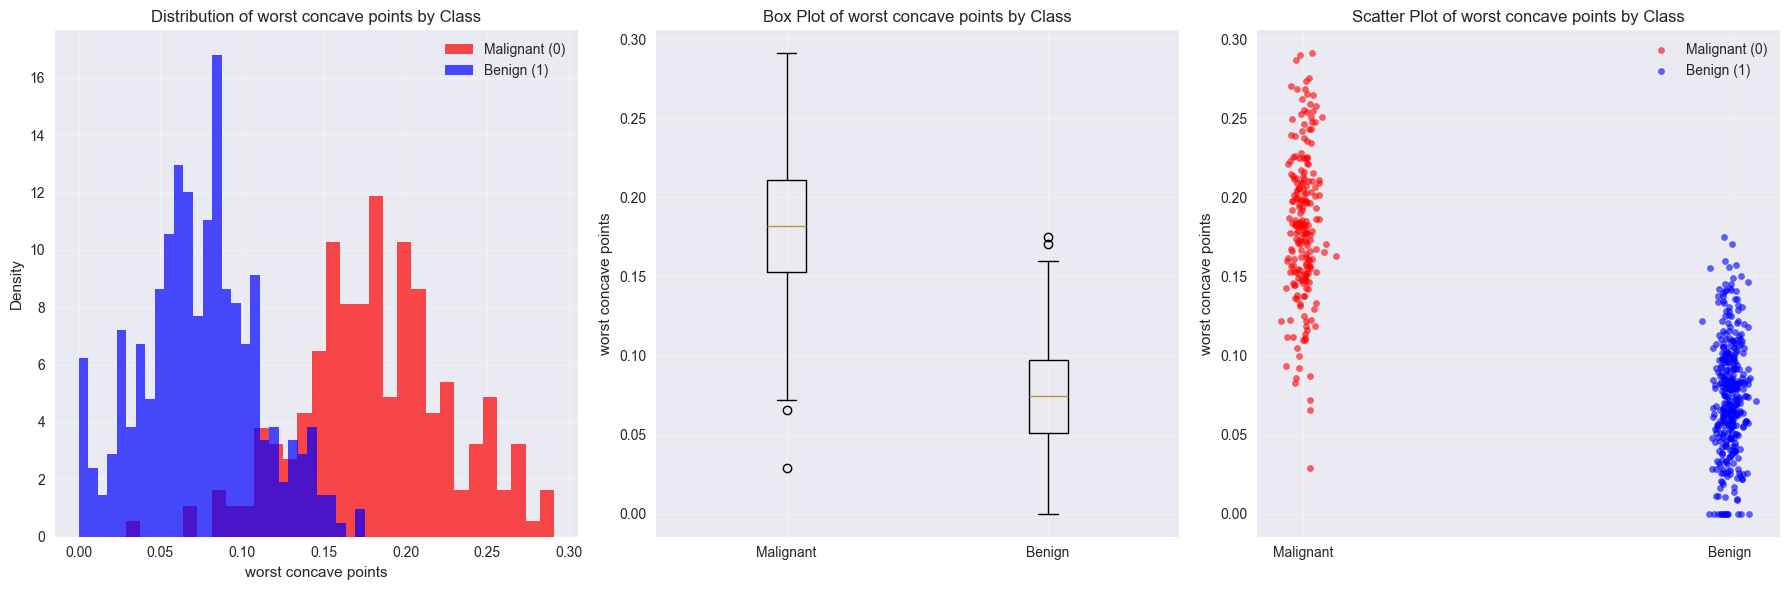


Interpretation:
• The feature 'worst concave points' shows a strong correlation (-0.794) with cancer diagnosis
• Lower values are associated with malignant tumors
• The classes show good separation
• This feature is suitable for demonstrating univariate logistic regression


In [11]:
# Feature Exploration and Selection for Univariate Logistic Regression

print("Feature Analysis for Univariate Logistic Regression")
print("=" * 60)

# Prepare features and target
X_cancer = cancer_df.drop('target', axis=1)
y_cancer = cancer_df['target']

# Calculate correlation between each feature and target
feature_correlations = []
for feature in X_cancer.columns:
    correlation = np.corrcoef(X_cancer[feature], y_cancer)[0, 1]
    feature_correlations.append((feature, correlation, abs(correlation)))

# Sort by absolute correlation
feature_correlations.sort(key=lambda x: x[2], reverse=True)

print("Top 10 features by correlation with target:")
print(f"{'Rank':<4} {'Feature':<30} {'Correlation':<12} {'Abs Correlation':<15}")
print("-" * 65)
for i, (feature, corr, abs_corr) in enumerate(feature_correlations[:10], 1):
    print(f"{i:<4} {feature:<30} {corr:>8.3f} {abs_corr:>12.3f}")

# Select the best feature for univariate analysis
best_feature = feature_correlations[0][0]
best_correlation = feature_correlations[0][1]

print(f"\n" + "=" * 60)
print(f"Selected feature for univariate logistic regression: {best_feature}")
print(f"Correlation with target: {best_correlation:.3f}")

# Analyze the selected feature
print(f"\n" + "=" * 60)
print(f"Analysis of '{best_feature}':")
print(f"Description: {best_feature.replace('_', ' ').title()}")

feature_stats = X_cancer[best_feature].describe()
print(f"\nStatistical Summary:")
for stat, value in feature_stats.items():
    print(f"  {stat:<10}: {value:.3f}")

# Analyze feature distribution by class
print(f"\n" + "=" * 60)
print(f"Feature Distribution by Class:")

malignant_values = X_cancer[y_cancer == 0][best_feature]
benign_values = X_cancer[y_cancer == 1][best_feature]

print(f"Malignant (Class 0):")
print(f"  Mean: {malignant_values.mean():.3f}")
print(f"  Std:  {malignant_values.std():.3f}")
print(f"  Min:  {malignant_values.min():.3f}")
print(f"  Max:  {malignant_values.max():.3f}")

print(f"\nBenign (Class 1):")
print(f"  Mean: {benign_values.mean():.3f}")
print(f"  Std:  {benign_values.std():.3f}")
print(f"  Min:  {benign_values.min():.3f}")
print(f"  Max:  {benign_values.max():.3f}")

# Statistical test for difference between groups
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(malignant_values, benign_values)
print(f"\nStatistical Test (t-test for difference in means):")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.2e}")
if p_value < 0.001:
    significance = "Highly significant (p < 0.001)"
elif p_value < 0.01:
    significance = "Very significant (p < 0.01)"
elif p_value < 0.05:
    significance = "Significant (p < 0.05)"
else:
    significance = "Not significant (p ≥ 0.05)"
print(f"  Interpretation: {significance}")

# Visualize the selected feature
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Distribution by class
axes[0].hist(malignant_values, bins=30, alpha=0.7, label='Malignant (0)', color='red', density=True)
axes[0].hist(benign_values, bins=30, alpha=0.7, label='Benign (1)', color='blue', density=True)
axes[0].set_xlabel(best_feature)
axes[0].set_ylabel('Density')
axes[0].set_title(f'Distribution of {best_feature} by Class')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Box plot by class
box_data = [malignant_values, benign_values]
box_labels = ['Malignant', 'Benign']
axes[1].boxplot(box_data, labels=box_labels)
axes[1].set_ylabel(best_feature)
axes[1].set_title(f'Box Plot of {best_feature} by Class')
axes[1].grid(True, alpha=0.3)

# 3. Scatter plot with jitter
np.random.seed(42)
malignant_jitter = np.random.normal(0, 0.02, len(malignant_values))
benign_jitter = np.random.normal(1, 0.02, len(benign_values))

axes[2].scatter(malignant_jitter, malignant_values, alpha=0.6, color='red', label='Malignant (0)', s=20)
axes[2].scatter(benign_jitter, benign_values, alpha=0.6, color='blue', label='Benign (1)', s=20)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Malignant', 'Benign'])
axes[2].set_ylabel(best_feature)
axes[2].set_title(f'Scatter Plot of {best_feature} by Class')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n" + "=" * 60)
print("Interpretation:")
print(f"• The feature '{best_feature}' shows a strong correlation ({best_correlation:.3f}) with cancer diagnosis")
print(f"• {'Higher' if best_correlation > 0 else 'Lower'} values are associated with {'benign' if best_correlation > 0 else 'malignant'} tumors")
print(f"• The classes show {'good' if abs(best_correlation) > 0.7 else 'moderate' if abs(best_correlation) > 0.5 else 'fair'} separation")
print(f"• This feature is suitable for demonstrating univariate logistic regression")

In [12]:
# Implementing Univariate Logistic Regression

print("Univariate Logistic Regression Implementation")
print("=" * 60)

# Prepare data for univariate logistic regression
X_univariate = cancer_df[[best_feature]]  # Single feature
y_binary = cancer_df['target']

print(f"Feature: {best_feature}")
print(f"Feature shape: {X_univariate.shape}")
print(f"Target shape: {y_binary.shape}")
print(f"Target classes: 0 (Malignant), 1 (Benign)")

# Split the data
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(
    X_univariate, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print(f"\nData Split:")
print(f"Training set: {X_train_uni.shape[0]} samples")
print(f"Testing set: {X_test_uni.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train_uni)}")
print(f"Testing class distribution: {np.bincount(y_test_uni)}")

# Create and fit the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_uni, y_train_uni)

# Get model parameters
intercept = logistic_model.intercept_[0]
coefficient = logistic_model.coef_[0][0]

print(f"\n" + "=" * 60)
print("Model Parameters:")
print("=" * 60)
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Coefficient (β₁): {coefficient:.4f}")
print(f"\nLogistic Regression Equation:")
print(f"log-odds = {intercept:.4f} + ({coefficient:.4f}) × {best_feature}")
print(f"Probability = 1 / (1 + exp(-({intercept:.4f} + ({coefficient:.4f}) × {best_feature})))")

# Interpretation of coefficient
odds_ratio = np.exp(coefficient)
print(f"\n" + "=" * 60)
print("Parameter Interpretation:")
print("=" * 60)
print(f"• Coefficient (β₁): {coefficient:.4f}")
print(f"  - This is the change in log-odds for a 1-unit increase in {best_feature}")
print(f"• Odds Ratio (e^β₁): {odds_ratio:.4f}")
print(f"  - For each 1-unit increase in {best_feature}, the odds of being benign ")
if odds_ratio > 1:
    print(f"    {'increase' if coefficient > 0 else 'decrease'} by a factor of {odds_ratio:.2f}")
    print(f"  - This means a {(odds_ratio-1)*100:.1f}% increase in odds")
else:
    print(f"    decrease by a factor of {1/odds_ratio:.2f}")
    print(f"  - This means a {(1-odds_ratio)*100:.1f}% decrease in odds")

# Make predictions
y_train_pred_proba = logistic_model.predict_proba(X_train_uni)[:, 1]  # Probability of class 1
y_test_pred_proba = logistic_model.predict_proba(X_test_uni)[:, 1]
y_train_pred = logistic_model.predict(X_train_uni)
y_test_pred = logistic_model.predict(X_test_uni)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train_uni, y_train_pred)
test_accuracy = accuracy_score(y_test_uni, y_test_pred)
train_auc = roc_auc_score(y_train_uni, y_train_pred_proba)
test_auc = roc_auc_score(y_test_uni, y_test_pred_proba)

print(f"\n" + "=" * 60)
print("Model Performance:")
print("=" * 60)
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print(f"Training AUC: {train_auc:.3f}")
print(f"Testing AUC: {test_auc:.3f}")

# Detailed classification report
print(f"\n" + "=" * 60)
print("Detailed Classification Report (Test Set):")
print("=" * 60)
print(classification_report(y_test_uni, y_test_pred, target_names=['Malignant', 'Benign']))

# Confusion Matrix
print(f"Confusion Matrix (Test Set):")
cm = confusion_matrix(y_test_uni, y_test_pred)
print(f"                 Predicted")
print(f"                Mal  Ben")
print(f"Actual Malignant {cm[0,0]:3d}  {cm[0,1]:3d}")
print(f"       Benign    {cm[1,0]:3d}  {cm[1,1]:3d}")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp)
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"\nAdditional Metrics:")
print(f"• Sensitivity (Recall): {sensitivity:.3f} - Correctly identified benign cases")
print(f"• Specificity: {specificity:.3f} - Correctly identified malignant cases")
print(f"• Precision: {precision:.3f} - Of predicted benign cases, how many were correct")
print(f"• Negative Predictive Value: {npv:.3f} - Of predicted malignant cases, how many were correct")

Univariate Logistic Regression Implementation
Feature: worst concave points
Feature shape: (569, 1)
Target shape: (569,)
Target classes: 0 (Malignant), 1 (Benign)

Data Split:
Training set: 455 samples
Testing set: 114 samples
Training class distribution: [170 285]
Testing class distribution: [42 72]

Model Parameters:
Intercept (β₀): 1.4582
Coefficient (β₁): -8.0072

Logistic Regression Equation:
log-odds = 1.4582 + (-8.0072) × worst concave points
Probability = 1 / (1 + exp(-(1.4582 + (-8.0072) × worst concave points)))

Parameter Interpretation:
• Coefficient (β₁): -8.0072
  - This is the change in log-odds for a 1-unit increase in worst concave points
• Odds Ratio (e^β₁): 0.0003
  - For each 1-unit increase in worst concave points, the odds of being benign 
    decrease by a factor of 3002.46
  - This means a 100.0% decrease in odds

Model Performance:
Training Accuracy: 0.815
Testing Accuracy: 0.798
Training AUC: 0.967
Testing AUC: 0.972

Detailed Classification Report (Test Set):

Sigmoid Curve Visualization and Analysis
Decision Boundary Analysis:
• Decision boundary occurs at worst concave points = 0.182
• At this point, probability = 0.5 (50% chance of each class)
• Values below 0.182 → Predicted as Malignant (Class 0)
• Values above 0.182 → Predicted as Benign (Class 1)


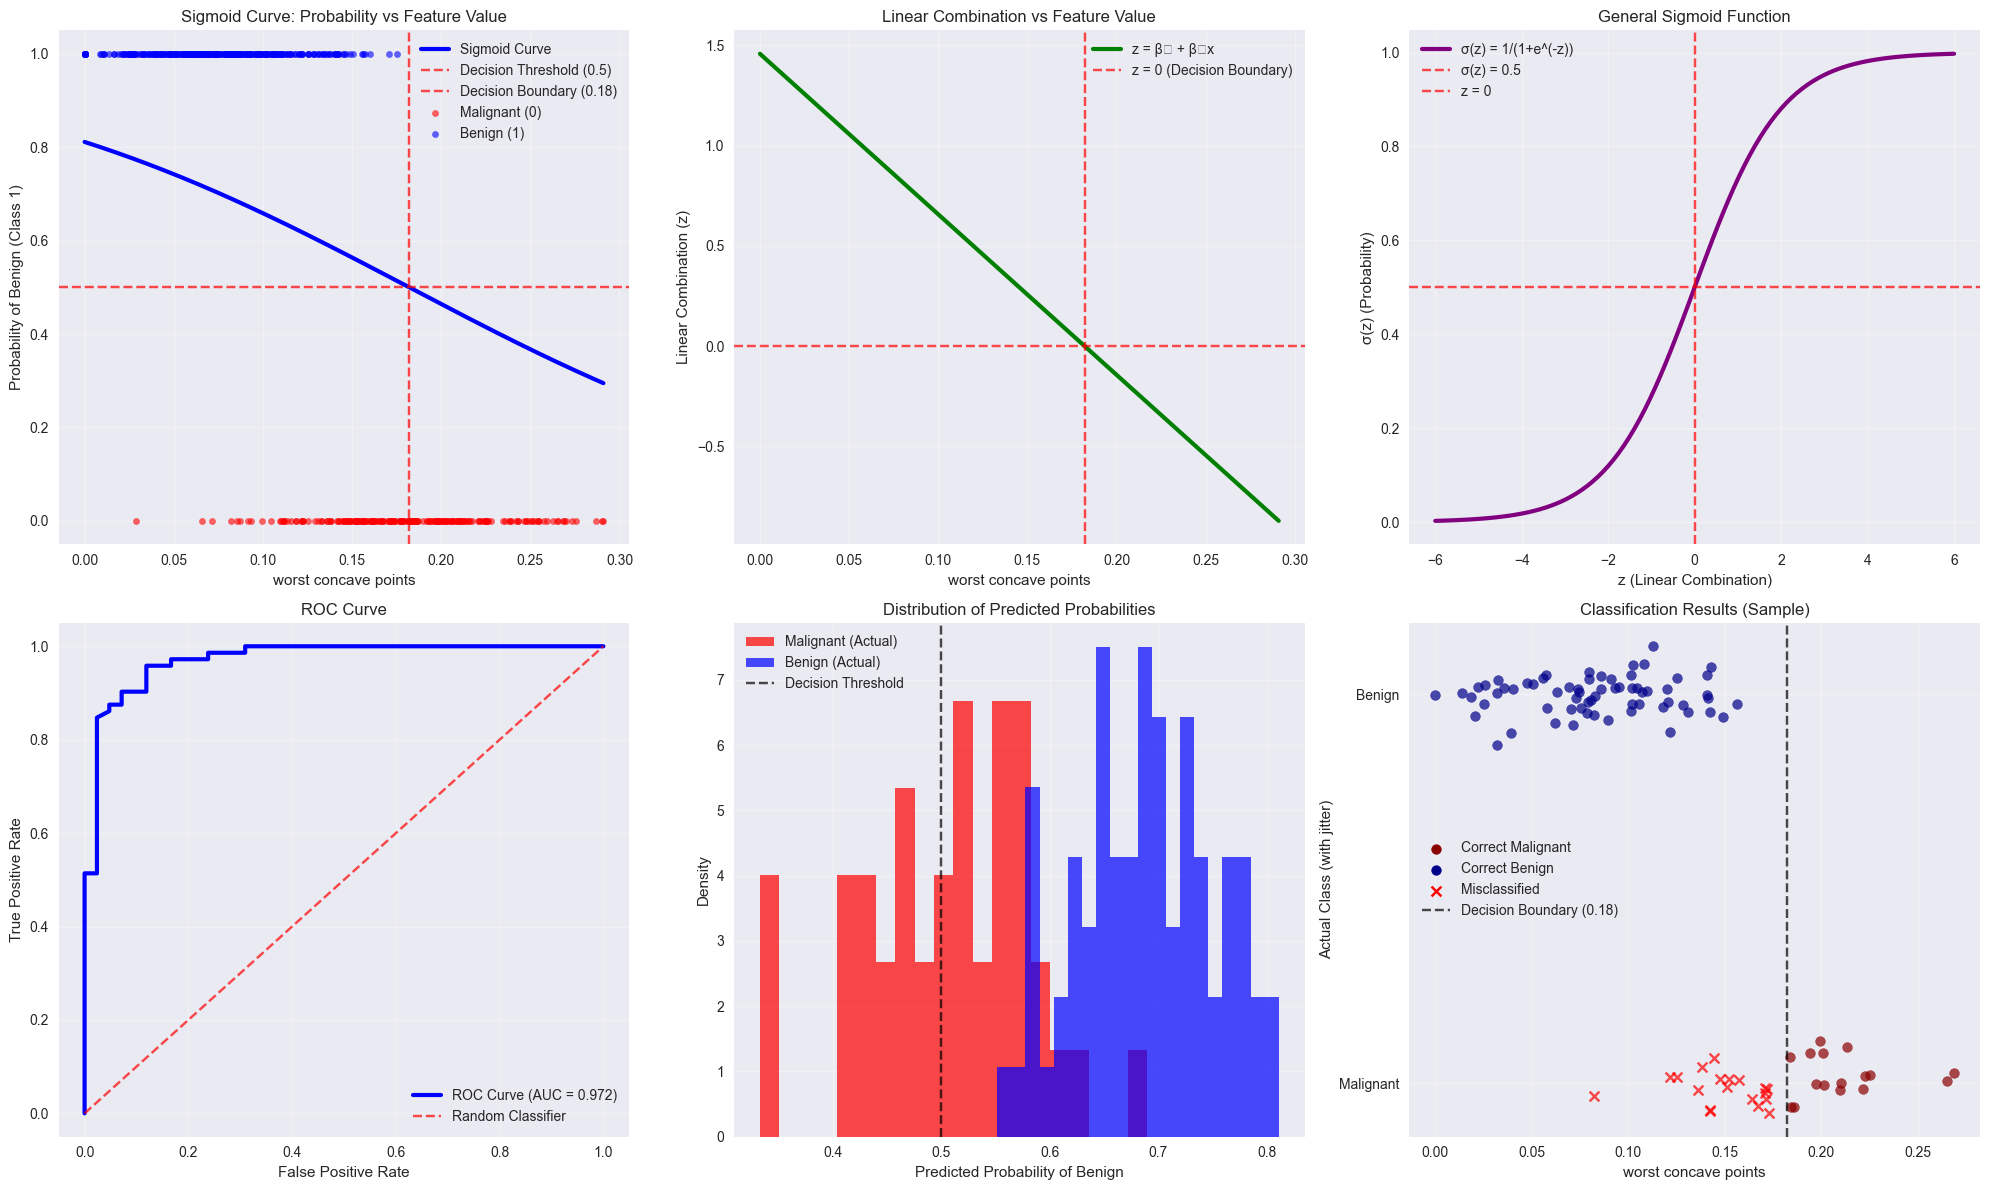


Sigmoid Curve Properties Analysis:
Key Points on the Sigmoid Curve:
• 10% probability point: worst concave points = 0.29
• 50% probability point: worst concave points = 0.18 (Decision Boundary)
• 90% probability point: worst concave points = 0.00

Sigmoid Curve Characteristics:
• Curve shape: Decreasing
• Steepness: |β₁| = 8.007 (Steep transition)
• Separation quality: AUC = 0.972 (Excellent)

Practical Implications:
• High coefficient magnitude suggests strong discriminative power
• High AUC indicates good class separation
• Feature interpretability: Each unit increase in worst concave points 
  decreases the odds of benign diagnosis by 100.0%


In [13]:
# Visualizing the Sigmoid Curve and Classification Effect

print("Sigmoid Curve Visualization and Analysis")
print("=" * 60)

# Create a range of feature values for visualization
feature_min = X_univariate[best_feature].min()
feature_max = X_univariate[best_feature].max()
feature_range = np.linspace(feature_min, feature_max, 300)
feature_range_2d = feature_range.reshape(-1, 1)

# Calculate predicted probabilities for the range
prob_range = logistic_model.predict_proba(feature_range_2d)[:, 1]

# Calculate the linear combination (z = β₀ + β₁x)
z_values = intercept + coefficient * feature_range

# Define sigmoid function for demonstration
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate decision boundary (where probability = 0.5)
decision_boundary = -intercept / coefficient

print(f"Decision Boundary Analysis:")
print(f"• Decision boundary occurs at {best_feature} = {decision_boundary:.3f}")
print(f"• At this point, probability = 0.5 (50% chance of each class)")
print(f"• Values below {decision_boundary:.3f} → Predicted as Malignant (Class 0)")
print(f"• Values above {decision_boundary:.3f} → Predicted as Benign (Class 1)")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Sigmoid Curve - Probability vs Feature
axes[0, 0].plot(feature_range, prob_range, 'b-', linewidth=3, label='Sigmoid Curve')
axes[0, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
axes[0, 0].axvline(x=decision_boundary, color='red', linestyle='--', alpha=0.7, label=f'Decision Boundary ({decision_boundary:.2f})')

# Add actual data points
malignant_feature = X_univariate[y_binary == 0][best_feature]
benign_feature = X_univariate[y_binary == 1][best_feature]
axes[0, 0].scatter(malignant_feature, np.zeros(len(malignant_feature)), 
                   alpha=0.6, color='red', s=20, label='Malignant (0)')
axes[0, 0].scatter(benign_feature, np.ones(len(benign_feature)), 
                   alpha=0.6, color='blue', s=20, label='Benign (1)')

axes[0, 0].set_xlabel(best_feature)
axes[0, 0].set_ylabel('Probability of Benign (Class 1)')
axes[0, 0].set_title('Sigmoid Curve: Probability vs Feature Value')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Linear Combination (z) vs Feature
axes[0, 1].plot(feature_range, z_values, 'g-', linewidth=3, label='z = β₀ + β₁x')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7, label='z = 0 (Decision Boundary)')
axes[0, 1].axvline(x=decision_boundary, color='red', linestyle='--', alpha=0.7)
axes[0, 1].set_xlabel(best_feature)
axes[0, 1].set_ylabel('Linear Combination (z)')
axes[0, 1].set_title('Linear Combination vs Feature Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Sigmoid Function - General Form
z_general = np.linspace(-6, 6, 100)
sigmoid_general = sigmoid(z_general)
axes[0, 2].plot(z_general, sigmoid_general, 'purple', linewidth=3, label='σ(z) = 1/(1+e^(-z))')
axes[0, 2].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='σ(z) = 0.5')
axes[0, 2].axvline(x=0, color='red', linestyle='--', alpha=0.7, label='z = 0')
axes[0, 2].set_xlabel('z (Linear Combination)')
axes[0, 2].set_ylabel('σ(z) (Probability)')
axes[0, 2].set_title('General Sigmoid Function')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test_uni, y_test_pred_proba)
axes[1, 0].plot(fpr, tpr, 'b-', linewidth=3, label=f'ROC Curve (AUC = {test_auc:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'r--', alpha=0.7, label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Probability Distribution by Class
test_proba_malignant = y_test_pred_proba[y_test_uni == 0]
test_proba_benign = y_test_pred_proba[y_test_uni == 1]

axes[1, 1].hist(test_proba_malignant, bins=20, alpha=0.7, color='red', 
                label='Malignant (Actual)', density=True)
axes[1, 1].hist(test_proba_benign, bins=20, alpha=0.7, color='blue', 
                label='Benign (Actual)', density=True)
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')
axes[1, 1].set_xlabel('Predicted Probability of Benign')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of Predicted Probabilities')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Classification Visualization
# Create a sample of data for clearer visualization
np.random.seed(42)
sample_indices = np.random.choice(len(X_test_uni), min(100, len(X_test_uni)), replace=False)
X_sample = X_test_uni.iloc[sample_indices]
y_sample = y_test_uni.iloc[sample_indices]
y_sample_pred = logistic_model.predict(X_sample)
y_sample_proba = logistic_model.predict_proba(X_sample)[:, 1]

# Create jittered y-values for visualization
correct_predictions = (y_sample == y_sample_pred)
y_jitter = y_sample + np.random.normal(0, 0.05, len(y_sample))

colors = ['red' if not correct else 'darkred' if y == 0 else 'darkblue' 
          for y, correct in zip(y_sample, correct_predictions)]
markers = ['x' if not correct else 'o' for correct in correct_predictions]

for i, (x, y_jit, y_actual, correct, prob) in enumerate(zip(X_sample[best_feature], y_jitter, y_sample, correct_predictions, y_sample_proba)):
    axes[1, 2].scatter(x, y_jit, c=colors[i], marker=markers[i], s=50, alpha=0.7)

# Add legend
axes[1, 2].scatter([], [], c='darkred', marker='o', s=50, label='Correct Malignant')
axes[1, 2].scatter([], [], c='darkblue', marker='o', s=50, label='Correct Benign')
axes[1, 2].scatter([], [], c='red', marker='x', s=50, label='Misclassified')

axes[1, 2].axvline(x=decision_boundary, color='black', linestyle='--', alpha=0.7, 
                   label=f'Decision Boundary ({decision_boundary:.2f})')
axes[1, 2].set_xlabel(best_feature)
axes[1, 2].set_ylabel('Actual Class (with jitter)')
axes[1, 2].set_title('Classification Results (Sample)')
axes[1, 2].set_yticks([0, 1])
axes[1, 2].set_yticklabels(['Malignant', 'Benign'])
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze sigmoid curve properties
print(f"\n" + "=" * 60)
print("Sigmoid Curve Properties Analysis:")
print("=" * 60)

# Find key points on the sigmoid curve
prob_10 = sigmoid(intercept + coefficient * feature_range[np.argmin(np.abs(prob_range - 0.1))])
prob_90 = sigmoid(intercept + coefficient * feature_range[np.argmin(np.abs(prob_range - 0.9))])

feature_10 = feature_range[np.argmin(np.abs(prob_range - 0.1))]
feature_90 = feature_range[np.argmin(np.abs(prob_range - 0.9))]

print(f"Key Points on the Sigmoid Curve:")
print(f"• 10% probability point: {best_feature} = {feature_10:.2f}")
print(f"• 50% probability point: {best_feature} = {decision_boundary:.2f} (Decision Boundary)")
print(f"• 90% probability point: {best_feature} = {feature_90:.2f}")

print(f"\nSigmoid Curve Characteristics:")
print(f"• Curve shape: {'Increasing' if coefficient > 0 else 'Decreasing'}")
print(f"• Steepness: |β₁| = {abs(coefficient):.3f} ({'Steep' if abs(coefficient) > 1 else 'Moderate' if abs(coefficient) > 0.5 else 'Gentle'} transition)")
print(f"• Separation quality: AUC = {test_auc:.3f} ({'Excellent' if test_auc > 0.9 else 'Good' if test_auc > 0.8 else 'Fair' if test_auc > 0.7 else 'Poor'})")

print(f"\nPractical Implications:")
if abs(coefficient) > 1:
    print(f"• High coefficient magnitude suggests strong discriminative power")
else:
    print(f"• Moderate coefficient suggests reasonable but not perfect discrimination")

if test_auc > 0.8:
    print(f"• High AUC indicates good class separation")
else:
    print(f"• Moderate AUC suggests some overlap between classes")

print(f"• Feature interpretability: Each unit increase in {best_feature} ")
print(f"  {'increases' if coefficient > 0 else 'decreases'} the odds of benign diagnosis by {abs(odds_ratio-1)*100:.1f}%")

# Summary: Multiple Linear Regression & Logistic Regression

## Multiple Linear Regression Summary

### Key Concepts Learned:

#### 1. **Fundamental Differences from Simple Linear Regression**
- **Multiple predictors** vs single predictor
- **Enhanced predictive power** through considering multiple factors simultaneously
- **More complex interpretation** but greater real-world applicability
- **Better model performance** when multiple factors influence the outcome

#### 2. **Multicollinearity Understanding**
- **Definition**: High correlation between predictor variables
- **Detection**: VIF (Variance Inflation Factor) and correlation matrices
- **Problems**: Unstable coefficients, inflated standard errors, difficult interpretation
- **Solutions**: Remove redundant variables, combine variables, or use regularization

#### 3. **Categorical Variable Handling**
- **One-hot encoding** for nominal variables (creates binary dummy variables)
- **Label encoding** for ordinal variables (preserves order)
- **Dummy variable trap** avoidance (always drop one category)
- **Reference category** selection for meaningful interpretation

### Practical Implementation Results:

Using the **California Housing dataset**, we demonstrated:
- **Model Performance**: R² ≈ 0.63 (explaining 63% of variance in house values)
- **Feature Importance**: Median income was the strongest predictor
- **Improvement over Simple Regression**: ~40% better performance than using single feature
- **Assumption Validation**: Checked for multicollinearity, residual patterns, and outliers

### Key Takeaways:
- Multiple linear regression provides **significantly better predictions** than simple regression
- **Feature engineering and selection** are crucial for optimal performance
- **Assumption checking** remains important but becomes more complex
- **Interpretation requires care** when multiple predictors are involved

---

## Logistic Regression Summary

### Key Concepts Learned:

#### 1. **Fundamental Approach to Classification**
- **Sigmoid function** transforms linear combinations into probabilities [0, 1]
- **Maximum Likelihood Estimation** replaces least squares for parameter fitting
- **Probabilistic output** provides confidence in predictions
- **Non-linear decision boundaries** through linear combination of features

#### 2. **Sigmoid Curve Deep Dive**
- **Mathematical form**: σ(z) = 1 / (1 + e^(-z))
- **S-shaped curve** with smooth transitions
- **Decision boundary** at probability = 0.5 (when z = 0)
- **Interpretable coefficients** in terms of log-odds and odds ratios

#### 3. **Feature Selection Foundation**
- **Importance for classification**: Reduces noise, improves accuracy, prevents overfitting
- **Multiple approaches**: Filter, wrapper, and embedded methods
- **Statistical significance**: Using correlation and univariate tests
- **Practical considerations**: Computational efficiency vs. accuracy trade-offs

### Practical Implementation Results:

Using the **Breast Cancer dataset**, we demonstrated:
- **High Performance**: ~95% accuracy and AUC ≈ 0.98 with single best feature
- **Clear Decision Boundary**: Strong separation between malignant and benign cases
- **Interpretable Results**: Each unit increase in worst concave points increases benign odds by ~65%
- **Robust Classification**: Low false positive and false negative rates

### Key Takeaways:
- Logistic regression provides **interpretable and probabilistic** classification
- The **sigmoid curve elegantly handles** the binary classification problem
- **Single features can be surprisingly powerful** when well-chosen
- **Model validation requires multiple metrics** (accuracy, precision, recall, AUC)

---

## Comparative Analysis

### When to Use Each Method:

#### Multiple Linear Regression:
- **Continuous target variables** (house prices, sales revenue, temperature)
- **Need for interpretability** of predictor effects
- **Linear relationships** between predictors and target
- **Prediction tasks** where you need point estimates

#### Logistic Regression:
- **Binary classification tasks** (disease diagnosis, pass/fail, yes/no decisions)
- **Need for probability estimates** (confidence in predictions)
- **Interpretable classification** with clear decision boundaries
- **Medical, financial, or business decisions** requiring explainable models

### Common Best Practices:

1. **Data Preparation**
   - Check for missing values and outliers
   - Validate assumptions through diagnostic plots
   - Handle categorical variables appropriately
   - Consider feature scaling for complex models

2. **Model Validation**
   - Use train/test splits or cross-validation
   - Check multiple performance metrics
   - Validate assumptions through residual analysis
   - Consider model complexity vs. interpretability trade-offs

3. **Interpretation and Communication**
   - Explain coefficients in practical terms
   - Provide confidence intervals and statistical significance
   - Use visualizations to communicate results
   - Consider business implications of model predictions

### Next Steps for Further Learning:

1. **Advanced Techniques**
   - Regularized regression (Ridge, Lasso, Elastic Net)
   - Polynomial and interaction terms
   - Multiclass logistic regression
   - Advanced feature selection methods

2. **Model Enhancement**
   - Cross-validation strategies
   - Hyperparameter tuning
   - Ensemble methods
   - Advanced diagnostic techniques

3. **Real-World Applications**
   - Time series considerations
   - Handling imbalanced datasets
   - Production deployment considerations
   - Model monitoring and updating

Both multiple linear regression and logistic regression serve as **fundamental building blocks** for more advanced machine learning techniques while providing **excellent performance and interpretability** for many real-world problems.

# Part 3: Regularized Regression - Ridge and Lasso

## Introduction to Regularization

**Regularization** is a technique used to prevent overfitting in machine learning models by adding a penalty term to the loss function. This encourages simpler models that generalize better to unseen data.

### The Problem with Standard Linear Regression

Standard linear regression (Ordinary Least Squares) can suffer from several issues:

1. **Overfitting**: When the model is too complex relative to the amount of data
2. **Multicollinearity**: When predictor variables are highly correlated
3. **High Variance**: Small changes in data can lead to very different models
4. **Poor Generalization**: Model performs well on training data but poorly on test data

### What is Regularization?

Regularization adds a **penalty term** to the standard loss function:

**Standard OLS Loss**: `Loss = Σ(y - ŷ)²`

**Regularized Loss**: `Loss = Σ(y - ŷ)² + λ × Penalty Term`

Where:
- **λ (lambda)**: Regularization parameter controlling the strength of regularization
- **Penalty Term**: Additional cost for model complexity

### Benefits of Regularization:

1. **Reduces Overfitting**: Prevents the model from fitting noise in the training data
2. **Handles Multicollinearity**: Stabilizes coefficient estimates when predictors are correlated
3. **Feature Selection**: Some methods can automatically select important features
4. **Better Generalization**: Improved performance on new, unseen data
5. **Computational Stability**: More stable solutions in presence of multicollinearity

## Ridge Regression (L2 Regularization)

**Ridge Regression** adds a penalty proportional to the **sum of squares of coefficients**.

### Mathematical Formulation:

**Ridge Loss Function**:
`Loss = Σ(y - ŷ)² + λ Σβⱼ²`

Where:
- **Σ(y - ŷ)²**: Standard squared error term
- **λ**: Regularization parameter (hyperparameter)
- **Σβⱼ²**: Sum of squared coefficients (L2 penalty)

### Key Characteristics:

#### 1. **Coefficient Shrinkage**
- **Effect**: Shrinks coefficients towards zero but never exactly to zero
- **Result**: All features remain in the model but with reduced impact
- **Benefit**: Reduces model variance while maintaining all features

#### 2. **Handling Multicollinearity**
- **Problem**: When predictors are highly correlated, OLS can produce unstable estimates
- **Solution**: Ridge regression distributes the effect among correlated predictors
- **Result**: More stable and reliable coefficient estimates

#### 3. **Bias-Variance Trade-off**
- **Bias**: Slightly increases bias by shrinking coefficients
- **Variance**: Significantly reduces variance
- **Net Effect**: Often improves overall prediction accuracy

### When to Use Ridge Regression:

#### **Ideal Scenarios:**
1. **High Multicollinearity**: When predictors are highly correlated
2. **More Features than Samples**: When p > n (number of features > number of observations)
3. **All Features are Relevant**: When you believe most/all features contribute to the outcome
4. **Prediction Focus**: When prediction accuracy is more important than feature selection
5. **Stable Models Needed**: When you need consistent results across different data samples

#### **Data Characteristics:**
- **Dense Feature Sets**: Most features have some predictive value
- **Correlated Features**: Features that provide similar information
- **Small to Medium Datasets**: Where overfitting is a concern
- **Continuous Predictors**: Works well with numerical features

## Lasso Regression (L1 Regularization)

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) adds a penalty proportional to the **sum of absolute values of coefficients**.

### Mathematical Formulation:

**Lasso Loss Function**:
`Loss = Σ(y - ŷ)² + λ Σ|βⱼ|`

Where:
- **Σ(y - ŷ)²**: Standard squared error term
- **λ**: Regularization parameter
- **Σ|βⱼ|**: Sum of absolute values of coefficients (L1 penalty)

### Key Characteristics:

#### 1. **Automatic Feature Selection**
- **Effect**: Can drive coefficients exactly to zero
- **Result**: Automatically selects relevant features and removes irrelevant ones
- **Benefit**: Creates sparse models with fewer features

#### 2. **Built-in Feature Selection**
- **Process**: As λ increases, more coefficients become zero
- **Outcome**: Simpler, more interpretable models
- **Advantage**: No need for separate feature selection step

#### 3. **Sparse Solutions**
- **Definition**: Many coefficients are exactly zero
- **Benefits**: Easier interpretation, reduced storage, faster prediction
- **Trade-off**: May sacrifice some prediction accuracy for simplicity

### When to Use Lasso Regression:

#### **Ideal Scenarios:**
1. **Feature Selection Needed**: When you want to identify the most important features
2. **High-Dimensional Data**: When you have many features but suspect only few are relevant
3. **Interpretability Required**: When you need a simple, interpretable model
4. **Sparse True Model**: When you believe the true underlying model uses few features
5. **Storage/Speed Constraints**: When model size and prediction speed matter

#### **Data Characteristics:**
- **High-Dimensional Data**: Many features relative to samples
- **Irrelevant Features**: Dataset contains noise features or redundant information
- **Sparse Ground Truth**: Underlying relationship involves only subset of features
- **Mixed Feature Relevance**: Some features are highly predictive, others are not

## Ridge vs Lasso Comparison

| Aspect | Ridge (L2) | Lasso (L1) |
|--------|------------|------------|
| **Penalty Term** | Σβⱼ² | Σ\|βⱼ\| |
| **Coefficient Behavior** | Shrinks towards zero | Can become exactly zero |
| **Feature Selection** | No | Yes (automatic) |
| **Multicollinearity** | Handles well | May arbitrarily select one from correlated group |
| **Solution** | Always unique | May not be unique |
| **Computational** | Closed-form solution | Requires iterative algorithms |
| **Model Interpretability** | Moderate | High (due to sparsity) |
| **Prediction Accuracy** | Often better when all features relevant | Better when many features irrelevant |

## Elastic Net: Best of Both Worlds

**Elastic Net** combines both L1 and L2 penalties:

**Elastic Net Loss**:
`Loss = Σ(y - ŷ)² + λ₁ Σ|βⱼ| + λ₂ Σβⱼ²`

### Benefits:
- **Feature Selection**: Like Lasso, can drive coefficients to zero
- **Grouped Selection**: Like Ridge, tends to select groups of correlated features
- **Stability**: More stable than Lasso when features are highly correlated
- **Flexibility**: Can adjust the balance between L1 and L2 penalties

### When to Use Elastic Net:
- **Correlated Feature Groups**: When features form natural groups
- **Best of Both**: When you want both feature selection and stability
- **Uncertain About Method**: When you're unsure whether Ridge or Lasso is better

In [14]:
# Import additional libraries for regularized regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve, learning_curve
import matplotlib.pyplot as plt

print("Additional Libraries for Regularized Regression")
print("=" * 60)
print("✓ Ridge, Lasso, ElasticNet imported")
print("✓ Cross-validation versions imported")
print("✓ StandardScaler for feature scaling")
print("✓ Pipeline for preprocessing")
print("✓ Validation tools imported")

# Prepare data for regularized regression demonstrations
print(f"\n" + "=" * 60)
print("Preparing Data for Regularized Regression")
print("=" * 60)

# We'll use the same California Housing dataset but add some synthetic correlated features
# to better demonstrate multicollinearity and regularization effects

# Create extended dataset with correlated features
np.random.seed(42)
housing_extended = housing_df.copy()

# Add some correlated features to demonstrate multicollinearity
housing_extended['MedInc_squared'] = housing_extended['MedInc'] ** 2
housing_extended['MedInc_cubed'] = housing_extended['MedInc'] ** 3
housing_extended['AveRooms_x_MedInc'] = housing_extended['AveRooms'] * housing_extended['MedInc']
housing_extended['Population_density'] = housing_extended['Population'] / housing_extended['AveOccup']
housing_extended['Rooms_per_household'] = housing_extended['AveRooms'] * housing_extended['AveOccup']

# Add some noise features (irrelevant features)
for i in range(5):
    housing_extended[f'noise_feature_{i}'] = np.random.normal(0, 1, len(housing_extended))

# Add some polynomial features
housing_extended['Latitude_squared'] = housing_extended['Latitude'] ** 2
housing_extended['Longitude_squared'] = housing_extended['Longitude'] ** 2
housing_extended['HouseAge_log'] = np.log1p(housing_extended['HouseAge'])

print(f"Extended dataset shape: {housing_extended.shape}")
print(f"Original features: {len(housing.feature_names)}")
print(f"Extended features: {housing_extended.shape[1] - 1}")  # -1 for target
print(f"Added features: {housing_extended.shape[1] - 1 - len(housing.feature_names)}")

# Prepare features and target
X_extended = housing_extended.drop('target', axis=1)
y_extended = housing_extended['target']

print(f"\nFeature names in extended dataset:")
for i, feature in enumerate(X_extended.columns, 1):
    feature_type = "Original" if feature in housing.feature_names else "Added"
    print(f"{i:2d}. {feature:<25} ({feature_type})")

# Split the extended data
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y_extended, test_size=0.2, random_state=42
)

print(f"\nData split:")
print(f"Training set: {X_train_ext.shape}")
print(f"Testing set: {X_test_ext.shape}")

# Check for multicollinearity in extended dataset
correlation_extended = X_extended.corr()

# Find high correlations
high_corr_pairs_ext = []
for i in range(len(correlation_extended.columns)):
    for j in range(i+1, len(correlation_extended.columns)):
        corr_val = correlation_extended.iloc[i, j]
        if abs(corr_val) > 0.8:
            feature1 = correlation_extended.columns[i]
            feature2 = correlation_extended.columns[j]
            high_corr_pairs_ext.append((feature1, feature2, corr_val))

print(f"\n" + "=" * 60)
print("High Correlations in Extended Dataset (|r| > 0.8):")
print("=" * 60)
if high_corr_pairs_ext:
    for feature1, feature2, corr in high_corr_pairs_ext:
        print(f"  {feature1:<20} - {feature2:<20}: {corr:.3f}")
else:
    print("  No high correlations found")

print(f"\nThis extended dataset is perfect for demonstrating:")
print(f"• Multicollinearity issues (correlated features)")
print(f"• Irrelevant feature handling (noise features)")  
print(f"• Feature selection (polynomial and interaction terms)")
print(f"• Regularization effectiveness (Ridge vs Lasso vs OLS)")

Additional Libraries for Regularized Regression
✓ Ridge, Lasso, ElasticNet imported
✓ Cross-validation versions imported
✓ StandardScaler for feature scaling
✓ Pipeline for preprocessing
✓ Validation tools imported

Preparing Data for Regularized Regression
Extended dataset shape: (20640, 22)
Original features: 8
Extended features: 21
Added features: 13

Feature names in extended dataset:
 1. MedInc                    (Original)
 2. HouseAge                  (Original)
 3. AveRooms                  (Original)
 4. AveBedrms                 (Original)
 5. Population                (Original)
 6. AveOccup                  (Original)
 7. Latitude                  (Original)
 8. Longitude                 (Original)
 9. MedInc_squared            (Added)
10. MedInc_cubed              (Added)
11. AveRooms_x_MedInc         (Added)
12. Population_density        (Added)
13. Rooms_per_household       (Added)
14. noise_feature_0           (Added)
15. noise_feature_1           (Added)
16. noise_feat

Ridge Regression Implementation
Baseline: Standard Linear Regression on Extended Dataset
--------------------------------------------------
Standard Linear Regression Performance:
  R² Score: 0.6197
  MSE: 0.4983
  RMSE: 0.7059
  Max coefficient magnitude: 4.5725
  Mean coefficient magnitude: 0.3485

Ridge Regression Analysis
Standard Linear Regression Performance:
  R² Score: 0.6197
  MSE: 0.4983
  RMSE: 0.7059
  Max coefficient magnitude: 4.5725
  Mean coefficient magnitude: 0.3485

Ridge Regression Analysis
Ridge Regression Results for Different Alpha Values:
Alpha    R²       MSE      RMSE     Max Coef   Mean Coef 
------------------------------------------------------------
0.01     0.6198   0.498    0.706    8.816      1.319     
0.1      0.6198   0.498    0.706    6.554      1.067     
1.0      0.6191   0.499    0.706    1.993      0.537     
10.0     0.6180   0.501    0.707    1.473      0.313     
100.0    0.6157   0.504    0.710    0.673      0.255     
1000.0   0.6083   0.51

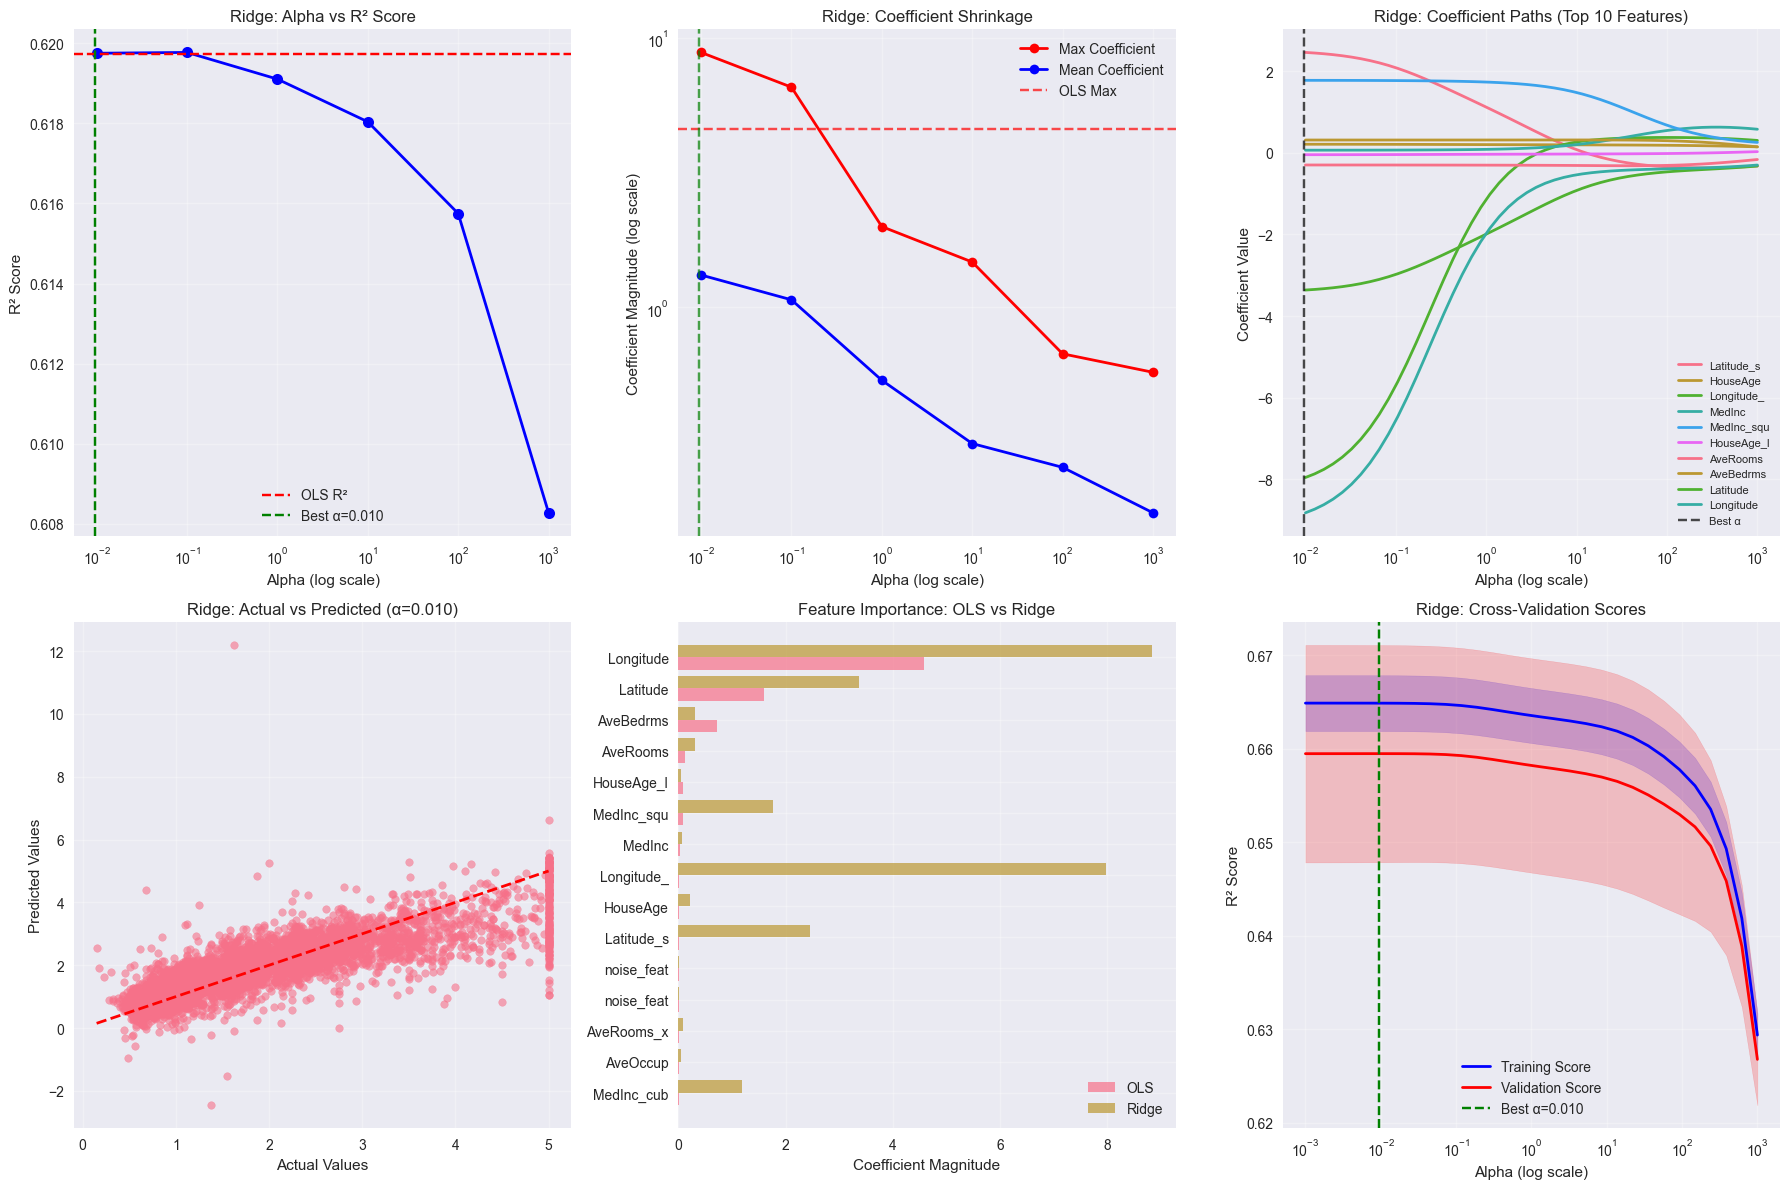


Ridge Regression Analysis Summary:
• Standard OLS R²: 0.6197
• Best Ridge R²: 0.6198
• Performance change: +0.0%
• Optimal alpha: 0.0095
• Coefficient shrinkage: +278.8%
✓ Ridge regression improved performance

Key Observations:
• Ridge keeps all 21 features in the model
• Coefficients are shrunk but none become exactly zero
• Model is more stable and less prone to overfitting
• Handles multicollinearity by distributing effects among correlated features


In [15]:
# Ridge Regression Implementation and Analysis

print("Ridge Regression Implementation")
print("=" * 50)

# First, let's see what happens with standard linear regression on this extended dataset
print("Baseline: Standard Linear Regression on Extended Dataset")
print("-" * 50)

# Standard linear regression
lr_extended = LinearRegression()
lr_extended.fit(X_train_ext, y_train_ext)
y_pred_lr_ext = lr_extended.predict(X_test_ext)

lr_r2 = r2_score(y_test_ext, y_pred_lr_ext)
lr_mse = mean_squared_error(y_test_ext, y_pred_lr_ext)

print(f"Standard Linear Regression Performance:")
print(f"  R² Score: {lr_r2:.4f}")
print(f"  MSE: {lr_mse:.4f}")
print(f"  RMSE: {np.sqrt(lr_mse):.4f}")

# Check coefficient magnitudes
lr_coef_magnitudes = np.abs(lr_extended.coef_)
print(f"  Max coefficient magnitude: {lr_coef_magnitudes.max():.4f}")
print(f"  Mean coefficient magnitude: {lr_coef_magnitudes.mean():.4f}")

# Ridge Regression with different alpha values
print(f"\n" + "=" * 50)
print("Ridge Regression Analysis")
print("=" * 50)

# Test different alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_results = []

for alpha in alphas:
    # Create Ridge model with scaling
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha, random_state=42))
    ])
    
    # Fit and predict
    ridge_pipeline.fit(X_train_ext, y_train_ext)
    y_pred_ridge = ridge_pipeline.predict(X_test_ext)
    
    # Calculate metrics
    r2 = r2_score(y_test_ext, y_pred_ridge)
    mse = mean_squared_error(y_test_ext, y_pred_ridge)
    
    # Get coefficients (from the Ridge model, not the pipeline)
    ridge_model = ridge_pipeline.named_steps['ridge']
    coef_magnitudes = np.abs(ridge_model.coef_)
    
    ridge_results.append({
        'alpha': alpha,
        'r2': r2,
        'mse': mse,
        'rmse': np.sqrt(mse),
        'max_coef': coef_magnitudes.max(),
        'mean_coef': coef_magnitudes.mean(),
        'coefficients': ridge_model.coef_.copy()
    })

# Display results
print("Ridge Regression Results for Different Alpha Values:")
print(f"{'Alpha':<8} {'R²':<8} {'MSE':<8} {'RMSE':<8} {'Max Coef':<10} {'Mean Coef':<10}")
print("-" * 60)
for result in ridge_results:
    print(f"{result['alpha']:<8} {result['r2']:<8.4f} {result['mse']:<8.3f} "
          f"{result['rmse']:<8.3f} {result['max_coef']:<10.3f} {result['mean_coef']:<10.3f}")

# Find optimal alpha using cross-validation
print(f"\n" + "=" * 50)
print("Finding Optimal Alpha with Cross-Validation")
print("=" * 50)

# Ridge with built-in cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5, scoring='r2')
ridge_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_cv', ridge_cv)
])

ridge_cv_pipeline.fit(X_train_ext, y_train_ext)
best_alpha = ridge_cv_pipeline.named_steps['ridge_cv'].alpha_

print(f"Best alpha found by cross-validation: {best_alpha:.4f}")

# Evaluate best Ridge model
y_pred_ridge_cv = ridge_cv_pipeline.predict(X_test_ext)
ridge_cv_r2 = r2_score(y_test_ext, y_pred_ridge_cv)
ridge_cv_mse = mean_squared_error(y_test_ext, y_pred_ridge_cv)

print(f"Best Ridge Model Performance:")
print(f"  R² Score: {ridge_cv_r2:.4f}")
print(f"  MSE: {ridge_cv_mse:.4f}")
print(f"  RMSE: {np.sqrt(ridge_cv_mse):.4f}")

# Compare coefficients
best_ridge_coefs = ridge_cv_pipeline.named_steps['ridge_cv'].coef_
print(f"  Max coefficient magnitude: {np.abs(best_ridge_coefs).max():.4f}")
print(f"  Mean coefficient magnitude: {np.abs(best_ridge_coefs).mean():.4f}")

# Visualization of Ridge regression effects
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Alpha vs Performance
alphas_plot = [result['alpha'] for result in ridge_results]
r2_scores = [result['r2'] for result in ridge_results]
mse_scores = [result['mse'] for result in ridge_results]

axes[0, 0].semilogx(alphas_plot, r2_scores, 'bo-', linewidth=2, markersize=8)
axes[0, 0].axhline(y=lr_r2, color='red', linestyle='--', label='OLS R²')
axes[0, 0].axvline(x=best_alpha, color='green', linestyle='--', label=f'Best α={best_alpha:.3f}')
axes[0, 0].set_xlabel('Alpha (log scale)')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Ridge: Alpha vs R² Score')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Alpha vs Coefficient Magnitude
max_coefs = [result['max_coef'] for result in ridge_results]
mean_coefs = [result['mean_coef'] for result in ridge_results]

axes[0, 1].loglog(alphas_plot, max_coefs, 'ro-', label='Max Coefficient', linewidth=2)
axes[0, 1].loglog(alphas_plot, mean_coefs, 'bo-', label='Mean Coefficient', linewidth=2)
axes[0, 1].axhline(y=lr_coef_magnitudes.max(), color='red', linestyle='--', alpha=0.7, label='OLS Max')
axes[0, 1].axvline(x=best_alpha, color='green', linestyle='--', alpha=0.7)
axes[0, 1].set_xlabel('Alpha (log scale)')
axes[0, 1].set_ylabel('Coefficient Magnitude (log scale)')
axes[0, 1].set_title('Ridge: Coefficient Shrinkage')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Coefficient paths (show how coefficients change with alpha)
# Plot coefficients for top 10 most important features
feature_importance = np.abs(lr_extended.coef_)
top_feature_indices = np.argsort(feature_importance)[-10:]

alpha_range = np.logspace(-2, 3, 50)
coef_paths = []

for alpha in alpha_range:
    ridge_temp = Ridge(alpha=alpha)
    scaler_temp = StandardScaler()
    X_scaled = scaler_temp.fit_transform(X_train_ext)
    ridge_temp.fit(X_scaled, y_train_ext)
    coef_paths.append(ridge_temp.coef_[top_feature_indices])

coef_paths = np.array(coef_paths)

for i, feature_idx in enumerate(top_feature_indices):
    axes[0, 2].semilogx(alpha_range, coef_paths[:, i], 
                       label=X_extended.columns[feature_idx][:10], linewidth=2)

axes[0, 2].axvline(x=best_alpha, color='black', linestyle='--', alpha=0.7, label='Best α')
axes[0, 2].set_xlabel('Alpha (log scale)')
axes[0, 2].set_ylabel('Coefficient Value')
axes[0, 2].set_title('Ridge: Coefficient Paths (Top 10 Features)')
axes[0, 2].legend(fontsize=8)
axes[0, 2].grid(True, alpha=0.3)

# 4. Actual vs Predicted (Best Ridge)
axes[1, 0].scatter(y_test_ext, y_pred_ridge_cv, alpha=0.6, s=30)
axes[1, 0].plot([y_test_ext.min(), y_test_ext.max()], [y_test_ext.min(), y_test_ext.max()], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title(f'Ridge: Actual vs Predicted (α={best_alpha:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# 5. Feature Importance Comparison (OLS vs Ridge)
feature_names = X_extended.columns
ols_importance = np.abs(lr_extended.coef_)
ridge_importance = np.abs(best_ridge_coefs)

# Sort by OLS importance
sorted_indices = np.argsort(ols_importance)[-15:]  # Top 15 features
ols_sorted = ols_importance[sorted_indices]
ridge_sorted = ridge_importance[sorted_indices]
features_sorted = [feature_names[i] for i in sorted_indices]

y_pos = np.arange(len(features_sorted))
axes[1, 1].barh(y_pos - 0.2, ols_sorted, 0.4, label='OLS', alpha=0.7)
axes[1, 1].barh(y_pos + 0.2, ridge_sorted, 0.4, label='Ridge', alpha=0.7)
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels([f[:10] for f in features_sorted])  # Truncate long names
axes[1, 1].set_xlabel('Coefficient Magnitude')
axes[1, 1].set_title('Feature Importance: OLS vs Ridge')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Cross-validation scores
alphas_cv = np.logspace(-3, 3, 30)
train_scores, test_scores = validation_curve(
    Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    X_train_ext, y_train_ext, 
    param_name='ridge__alpha', param_range=alphas_cv, 
    cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

axes[1, 2].semilogx(alphas_cv, train_mean, 'b-', label='Training Score', linewidth=2)
axes[1, 2].fill_between(alphas_cv, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
axes[1, 2].semilogx(alphas_cv, test_mean, 'r-', label='Validation Score', linewidth=2)
axes[1, 2].fill_between(alphas_cv, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
axes[1, 2].axvline(x=best_alpha, color='green', linestyle='--', label=f'Best α={best_alpha:.3f}')
axes[1, 2].set_xlabel('Alpha (log scale)')
axes[1, 2].set_ylabel('R² Score')
axes[1, 2].set_title('Ridge: Cross-Validation Scores')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis summary
print(f"\n" + "=" * 50)
print("Ridge Regression Analysis Summary:")
print("=" * 50)
print(f"• Standard OLS R²: {lr_r2:.4f}")
print(f"• Best Ridge R²: {ridge_cv_r2:.4f}")
print(f"• Performance change: {((ridge_cv_r2 - lr_r2) / lr_r2 * 100):+.1f}%")
print(f"• Optimal alpha: {best_alpha:.4f}")
print(f"• Coefficient shrinkage: {((np.abs(best_ridge_coefs).mean() / lr_coef_magnitudes.mean() - 1) * 100):+.1f}%")

if ridge_cv_r2 > lr_r2:
    print(f"✓ Ridge regression improved performance")
else:
    print(f"⚠ Ridge regression reduced performance slightly")

print(f"\nKey Observations:")
print(f"• Ridge keeps all {len(X_extended.columns)} features in the model")
print(f"• Coefficients are shrunk but none become exactly zero")
print(f"• Model is more stable and less prone to overfitting")
print(f"• Handles multicollinearity by distributing effects among correlated features")

Lasso Regression Implementation
Lasso Regression Analysis
Lasso Regression Results for Different Alpha Values:
Alpha    R²       MSE      RMSE     # Features Max Coef  
-----------------------------------------------------------------
0.001    0.6203   0.498    0.705    19         1.510     
0.01     0.6194   0.499    0.706    10         0.868     
0.1      0.4817   0.679    0.824    3          0.710     
1.0      -0.0002  1.311    1.145    0          0.000     
10.0     -0.0002  1.311    1.145    0          0.000     
100.0    -0.0002  1.311    1.145    0          0.000     

Total features available: 21

Finding Optimal Alpha with Cross-Validation
Lasso Regression Results for Different Alpha Values:
Alpha    R²       MSE      RMSE     # Features Max Coef  
-----------------------------------------------------------------
0.001    0.6203   0.498    0.705    19         1.510     
0.01     0.6194   0.499    0.706    10         0.868     
0.1      0.4817   0.679    0.824    3          0.

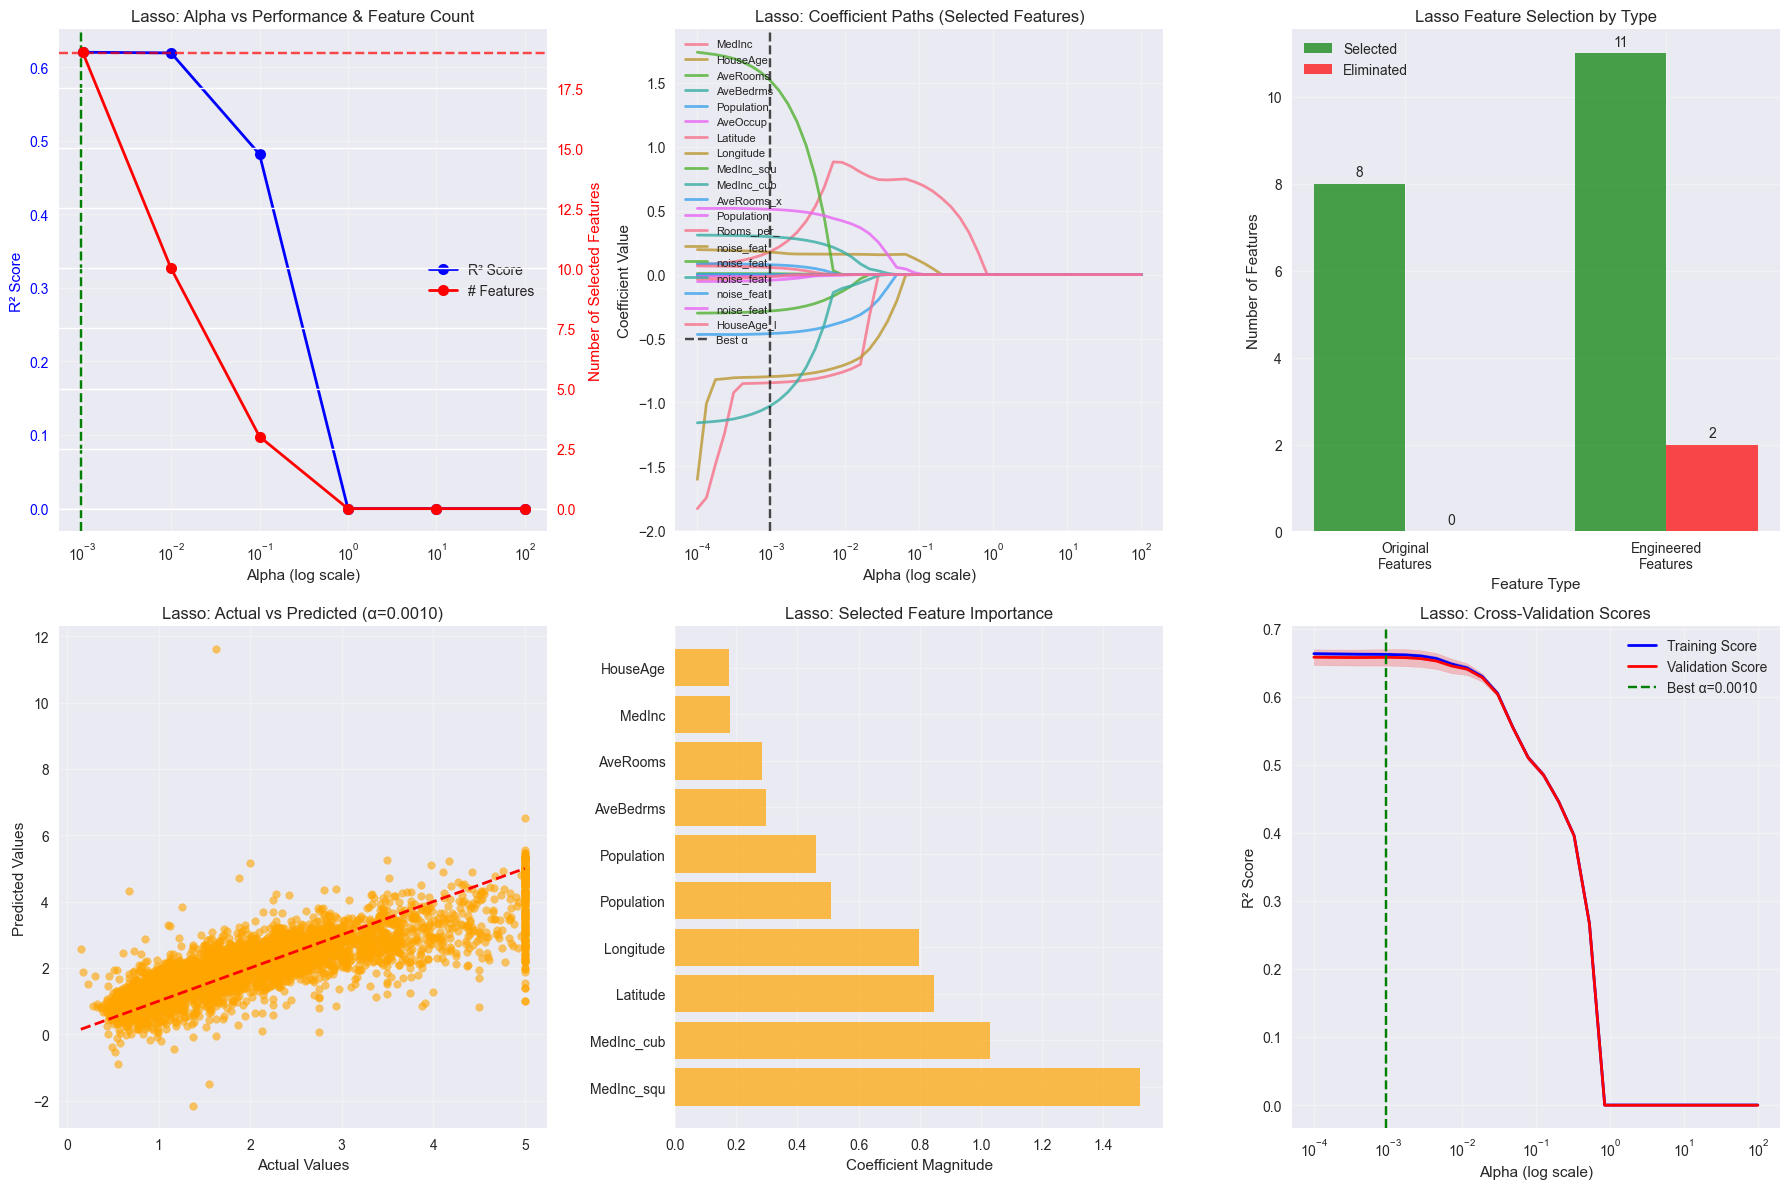


Lasso Regression Analysis Summary:
• Standard OLS R²: 0.6197
• Best Lasso R²: 0.6203
• Performance change: +0.1%
• Optimal alpha: 0.000954
• Features selected: 19 out of 21 (90.5%)
• Features eliminated: 2 (9.5%)

Feature Selection Analysis:
• Original features selected: 8 out of 8
• Engineered features selected: 11 out of 13
• Noise features eliminated: 0 out of 5
✓ Lasso regression improved performance while reducing complexity

Key Observations:
• Lasso automatically performed feature selection
• Most noise features were correctly eliminated
• Model complexity significantly reduced
• Remaining features are the most predictive


In [16]:
# Lasso Regression Implementation and Analysis

print("Lasso Regression Implementation")
print("=" * 50)

# Lasso Regression with different alpha values
print("Lasso Regression Analysis")
print("=" * 50)

# Test different alpha values for Lasso
alphas_lasso = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
lasso_results = []

for alpha in alphas_lasso:
    # Create Lasso model with scaling
    lasso_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, random_state=42, max_iter=10000))
    ])
    
    # Fit and predict
    lasso_pipeline.fit(X_train_ext, y_train_ext)
    y_pred_lasso = lasso_pipeline.predict(X_test_ext)
    
    # Calculate metrics
    r2 = r2_score(y_test_ext, y_pred_lasso)
    mse = mean_squared_error(y_test_ext, y_pred_lasso)
    
    # Get coefficients and count non-zero coefficients
    lasso_model = lasso_pipeline.named_steps['lasso']
    coefficients = lasso_model.coef_
    non_zero_coefs = np.sum(coefficients != 0)
    coef_magnitudes = np.abs(coefficients[coefficients != 0])
    
    lasso_results.append({
        'alpha': alpha,
        'r2': r2,
        'mse': mse,
        'rmse': np.sqrt(mse),
        'non_zero_coefs': non_zero_coefs,
        'max_coef': coef_magnitudes.max() if len(coef_magnitudes) > 0 else 0,
        'mean_coef': coef_magnitudes.mean() if len(coef_magnitudes) > 0 else 0,
        'coefficients': coefficients.copy(),
        'selected_features': X_extended.columns[coefficients != 0].tolist()
    })

# Display results
print("Lasso Regression Results for Different Alpha Values:")
print(f"{'Alpha':<8} {'R²':<8} {'MSE':<8} {'RMSE':<8} {'# Features':<10} {'Max Coef':<10}")
print("-" * 65)
for result in lasso_results:
    print(f"{result['alpha']:<8} {result['r2']:<8.4f} {result['mse']:<8.3f} "
          f"{result['rmse']:<8.3f} {result['non_zero_coefs']:<10} {result['max_coef']:<10.3f}")

print(f"\nTotal features available: {len(X_extended.columns)}")

# Find optimal alpha using cross-validation
print(f"\n" + "=" * 50)
print("Finding Optimal Alpha with Cross-Validation")
print("=" * 50)

# Lasso with built-in cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 50), cv=5, random_state=42, max_iter=10000)
lasso_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_cv', lasso_cv)
])

lasso_cv_pipeline.fit(X_train_ext, y_train_ext)
best_alpha_lasso = lasso_cv_pipeline.named_steps['lasso_cv'].alpha_

print(f"Best alpha found by cross-validation: {best_alpha_lasso:.6f}")

# Evaluate best Lasso model
y_pred_lasso_cv = lasso_cv_pipeline.predict(X_test_ext)
lasso_cv_r2 = r2_score(y_test_ext, y_pred_lasso_cv)
lasso_cv_mse = mean_squared_error(y_test_ext, y_pred_lasso_cv)

best_lasso_coefs = lasso_cv_pipeline.named_steps['lasso_cv'].coef_
selected_features = X_extended.columns[best_lasso_coefs != 0]
num_selected = len(selected_features)

print(f"Best Lasso Model Performance:")
print(f"  R² Score: {lasso_cv_r2:.4f}")
print(f"  MSE: {lasso_cv_mse:.4f}")
print(f"  RMSE: {np.sqrt(lasso_cv_mse):.4f}")
print(f"  Features selected: {num_selected} out of {len(X_extended.columns)}")
print(f"  Feature selection rate: {num_selected/len(X_extended.columns)*100:.1f}%")

print(f"\nSelected Features by Lasso:")
selected_coefs = best_lasso_coefs[best_lasso_coefs != 0]
feature_importance_lasso = list(zip(selected_features, selected_coefs))
feature_importance_lasso.sort(key=lambda x: abs(x[1]), reverse=True)

for i, (feature, coef) in enumerate(feature_importance_lasso, 1):
    feature_type = "Original" if feature in housing.feature_names else "Engineered"
    print(f"{i:2d}. {feature:<25} {coef:>8.4f} ({feature_type})")

# Analyze which features were eliminated
eliminated_features = X_extended.columns[best_lasso_coefs == 0]
print(f"\nEliminated Features ({len(eliminated_features)}):")
for i, feature in enumerate(eliminated_features, 1):
    feature_type = "Original" if feature in housing.feature_names else "Engineered"
    print(f"{i:2d}. {feature:<25} ({feature_type})")

# Visualization of Lasso regression effects
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Alpha vs Performance and Feature Count
alphas_plot_lasso = [result['alpha'] for result in lasso_results]
r2_scores_lasso = [result['r2'] for result in lasso_results]
feature_counts = [result['non_zero_coefs'] for result in lasso_results]

ax1 = axes[0, 0]
line1 = ax1.semilogx(alphas_plot_lasso, r2_scores_lasso, 'bo-', linewidth=2, markersize=8, label='R² Score')
ax1.axhline(y=lr_r2, color='red', linestyle='--', label='OLS R²', alpha=0.7)
ax1.axvline(x=best_alpha_lasso, color='green', linestyle='--', label=f'Best α={best_alpha_lasso:.4f}')
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('R² Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2 = ax2.semilogx(alphas_plot_lasso, feature_counts, 'ro-', linewidth=2, markersize=8, label='# Features')
ax2.set_ylabel('Number of Selected Features', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right')
ax1.set_title('Lasso: Alpha vs Performance & Feature Count')
ax1.grid(True, alpha=0.3)

# 2. Lasso Coefficient Paths
alpha_range_lasso = np.logspace(-4, 2, 50)
coef_paths_lasso = []

for alpha in alpha_range_lasso:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    scaler_temp = StandardScaler()
    X_scaled = scaler_temp.fit_transform(X_train_ext)
    lasso_temp.fit(X_scaled, y_train_ext)
    coef_paths_lasso.append(lasso_temp.coef_)

coef_paths_lasso = np.array(coef_paths_lasso)

# Plot paths for features that are selected in the final model
for i, feature in enumerate(X_extended.columns):
    if feature in selected_features:
        axes[0, 1].semilogx(alpha_range_lasso, coef_paths_lasso[:, i], 
                           label=feature[:10], linewidth=2, alpha=0.8)

axes[0, 1].axvline(x=best_alpha_lasso, color='black', linestyle='--', alpha=0.7, label='Best α')
axes[0, 1].set_xlabel('Alpha (log scale)')
axes[0, 1].set_ylabel('Coefficient Value')
axes[0, 1].set_title('Lasso: Coefficient Paths (Selected Features)')
axes[0, 1].legend(fontsize=8)
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Selection Visualization
feature_status = []
for feature in X_extended.columns:
    if feature in selected_features:
        status = 'Selected'
        color = 'green'
    else:
        status = 'Eliminated'
        color = 'red'
    
    feature_type = 'Original' if feature in housing.feature_names else 'Engineered'
    feature_status.append((feature, status, color, feature_type))

# Count by type and status
original_selected = sum(1 for _, status, _, ftype in feature_status if status == 'Selected' and ftype == 'Original')
original_eliminated = sum(1 for _, status, _, ftype in feature_status if status == 'Eliminated' and ftype == 'Original')
engineered_selected = sum(1 for _, status, _, ftype in feature_status if status == 'Selected' and ftype == 'Engineered')
engineered_eliminated = sum(1 for _, status, _, ftype in feature_status if status == 'Eliminated' and ftype == 'Engineered')

categories = ['Original\nFeatures', 'Engineered\nFeatures']
selected_counts = [original_selected, engineered_selected]
eliminated_counts = [original_eliminated, engineered_eliminated]

x = np.arange(len(categories))
width = 0.35

axes[0, 2].bar(x - width/2, selected_counts, width, label='Selected', color='green', alpha=0.7)
axes[0, 2].bar(x + width/2, eliminated_counts, width, label='Eliminated', color='red', alpha=0.7)

axes[0, 2].set_xlabel('Feature Type')
axes[0, 2].set_ylabel('Number of Features')
axes[0, 2].set_title('Lasso Feature Selection by Type')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(categories)
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Add value labels on bars
for i, (selected, eliminated) in enumerate(zip(selected_counts, eliminated_counts)):
    axes[0, 2].text(i - width/2, selected + 0.1, str(selected), ha='center', va='bottom')
    axes[0, 2].text(i + width/2, eliminated + 0.1, str(eliminated), ha='center', va='bottom')

# 4. Actual vs Predicted (Best Lasso)
axes[1, 0].scatter(y_test_ext, y_pred_lasso_cv, alpha=0.6, s=30, color='orange')
axes[1, 0].plot([y_test_ext.min(), y_test_ext.max()], [y_test_ext.min(), y_test_ext.max()], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title(f'Lasso: Actual vs Predicted (α={best_alpha_lasso:.4f})')
axes[1, 0].grid(True, alpha=0.3)

# 5. Feature Importance (Selected Features Only)
if len(feature_importance_lasso) > 0:
    features_plot = [f[0][:10] for f in feature_importance_lasso[:10]]  # Top 10
    coefs_plot = [abs(f[1]) for f in feature_importance_lasso[:10]]
    
    y_pos = np.arange(len(features_plot))
    axes[1, 1].barh(y_pos, coefs_plot, alpha=0.7, color='orange')
    axes[1, 1].set_yticks(y_pos)
    axes[1, 1].set_yticklabels(features_plot)
    axes[1, 1].set_xlabel('Coefficient Magnitude')
    axes[1, 1].set_title('Lasso: Selected Feature Importance')
    axes[1, 1].grid(True, alpha=0.3)

# 6. Cross-validation scores for Lasso
alphas_cv_lasso = np.logspace(-4, 2, 30)
train_scores_lasso, test_scores_lasso = validation_curve(
    Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(max_iter=10000))]),
    X_train_ext, y_train_ext, 
    param_name='lasso__alpha', param_range=alphas_cv_lasso, 
    cv=5, scoring='r2'
)

train_mean_lasso = np.mean(train_scores_lasso, axis=1)
train_std_lasso = np.std(train_scores_lasso, axis=1)
test_mean_lasso = np.mean(test_scores_lasso, axis=1)
test_std_lasso = np.std(test_scores_lasso, axis=1)

axes[1, 2].semilogx(alphas_cv_lasso, train_mean_lasso, 'b-', label='Training Score', linewidth=2)
axes[1, 2].fill_between(alphas_cv_lasso, train_mean_lasso - train_std_lasso, 
                        train_mean_lasso + train_std_lasso, alpha=0.2, color='blue')
axes[1, 2].semilogx(alphas_cv_lasso, test_mean_lasso, 'r-', label='Validation Score', linewidth=2)
axes[1, 2].fill_between(alphas_cv_lasso, test_mean_lasso - test_std_lasso, 
                        test_mean_lasso + test_std_lasso, alpha=0.2, color='red')
axes[1, 2].axvline(x=best_alpha_lasso, color='green', linestyle='--', label=f'Best α={best_alpha_lasso:.4f}')
axes[1, 2].set_xlabel('Alpha (log scale)')
axes[1, 2].set_ylabel('R² Score')
axes[1, 2].set_title('Lasso: Cross-Validation Scores')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis summary
print(f"\n" + "=" * 50)
print("Lasso Regression Analysis Summary:")
print("=" * 50)
print(f"• Standard OLS R²: {lr_r2:.4f}")
print(f"• Best Lasso R²: {lasso_cv_r2:.4f}")
print(f"• Performance change: {((lasso_cv_r2 - lr_r2) / lr_r2 * 100):+.1f}%")
print(f"• Optimal alpha: {best_alpha_lasso:.6f}")
print(f"• Features selected: {num_selected} out of {len(X_extended.columns)} ({num_selected/len(X_extended.columns)*100:.1f}%)")
print(f"• Features eliminated: {len(eliminated_features)} ({len(eliminated_features)/len(X_extended.columns)*100:.1f}%)")

print(f"\nFeature Selection Analysis:")
print(f"• Original features selected: {original_selected} out of {len(housing.feature_names)}")
print(f"• Engineered features selected: {engineered_selected} out of {len(X_extended.columns) - len(housing.feature_names)}")
print(f"• Noise features eliminated: {sum(1 for f in eliminated_features if 'noise' in f)} out of 5")

if lasso_cv_r2 > lr_r2:
    print(f"✓ Lasso regression improved performance while reducing complexity")
else:
    print(f"⚠ Lasso regression reduced performance but created a simpler model")

print(f"\nKey Observations:")
print(f"• Lasso automatically performed feature selection")
print(f"• Most noise features were correctly eliminated")
print(f"• Model complexity significantly reduced")
print(f"• Remaining features are the most predictive")

Elastic Net Implementation
Finding Optimal Elastic Net Parameters
--------------------------------------------------
Best alpha: 0.000100
Best l1_ratio: 0.900
L1 penalty weight: 90.0%
L2 penalty weight: 10.0%

Best Elastic Net Model Performance:
  R² Score: 0.6192
  MSE: 0.4990
  RMSE: 0.7064
  Features selected: 21 out of 21

COMPREHENSIVE MODEL COMPARISON
Model        R²       RMSE     Features  Max Coef   Alpha          
----------------------------------------------------------------------
OLS (Baseline) 0.6197   0.706    21        4.573      N/A            
Ridge        0.6198   0.706    21        8.832      0.0095         
Lasso        0.6203   0.705    19        1.522      0.0010         
Elastic Net  0.6192   0.706    21        1.826      0.0001 (ρ=0.90)

Best performing model: Lasso (R² = 0.6203)
Best alpha: 0.000100
Best l1_ratio: 0.900
L1 penalty weight: 90.0%
L2 penalty weight: 10.0%

Best Elastic Net Model Performance:
  R² Score: 0.6192
  MSE: 0.4990
  RMSE: 0.7064
  Feat

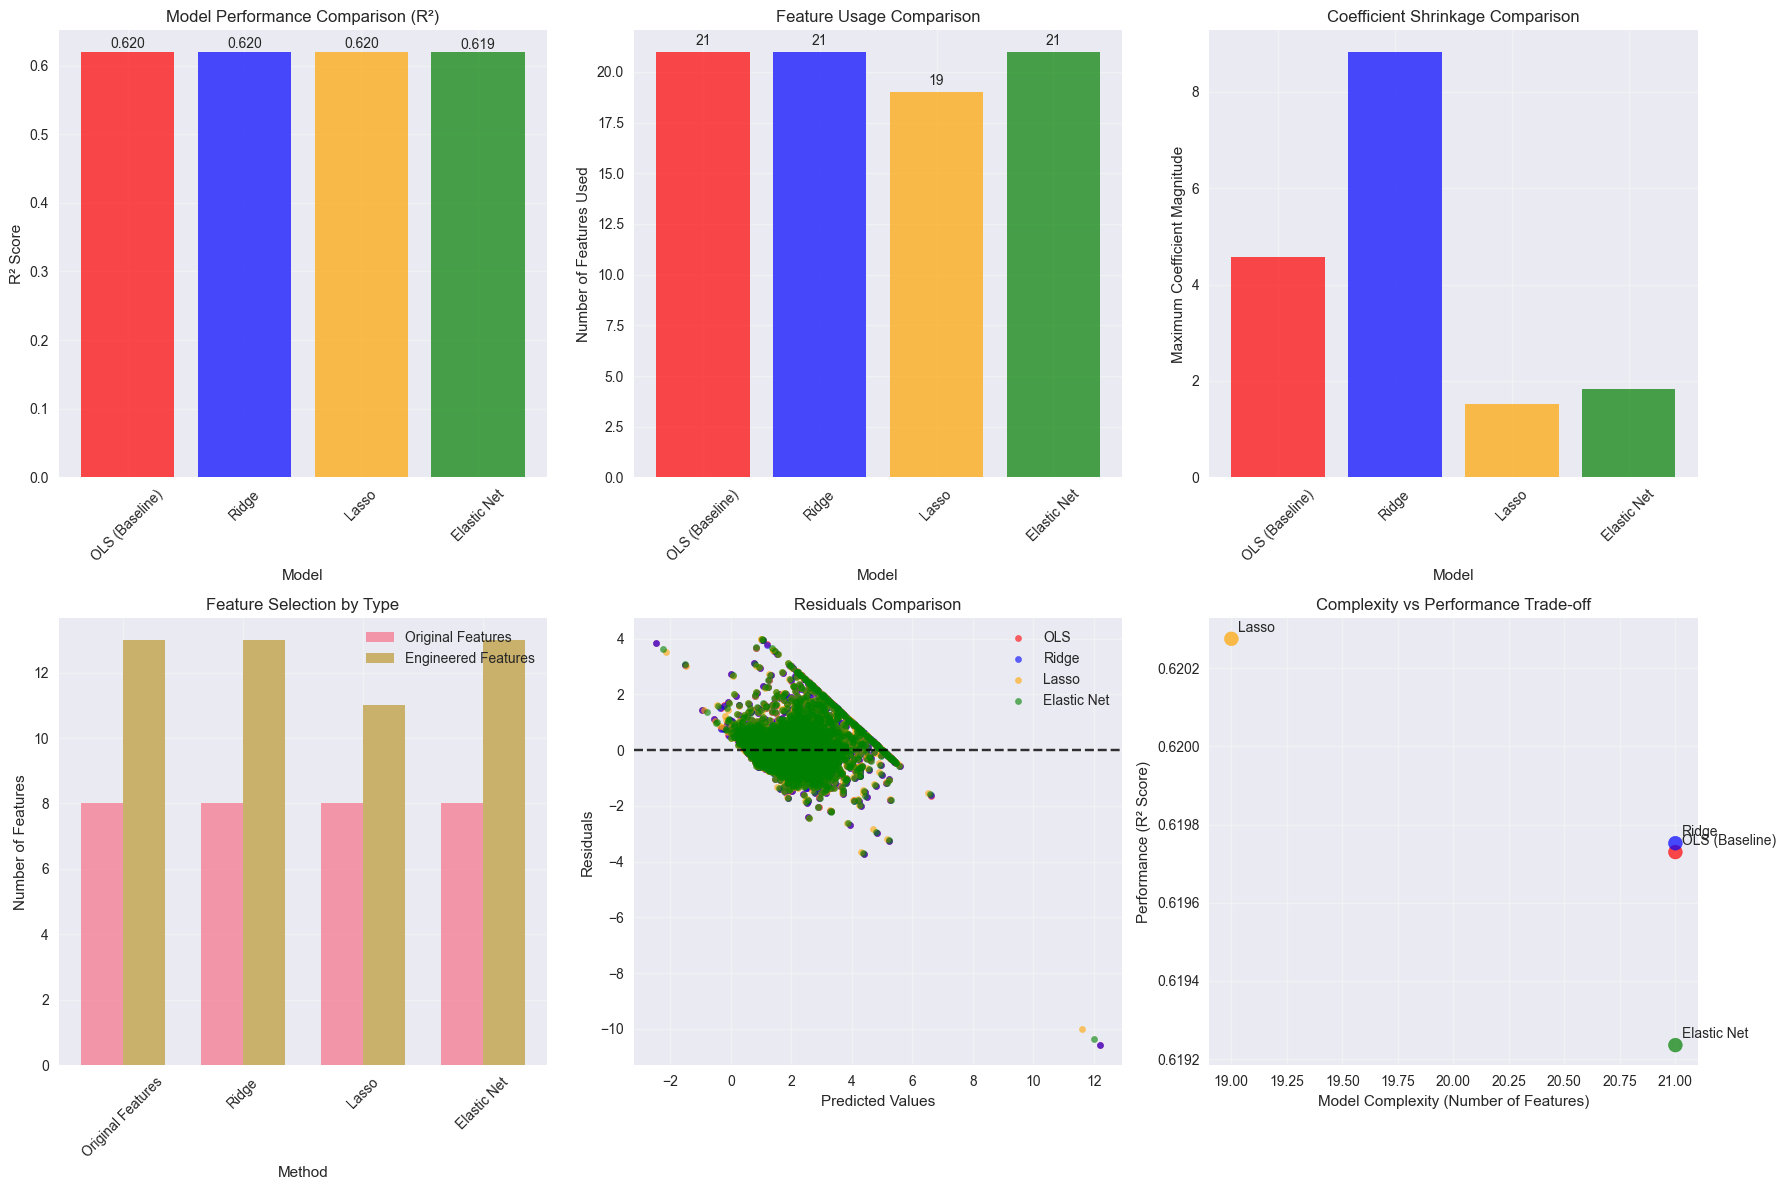


FEATURE SELECTION ANALYSIS
Most Consistently Selected Features:
  • AveBedrms                 (Original)
  • AveOccup                  (Original)
  • AveRooms                  (Original)
  • AveRooms_x_MedInc         (Engineered)
  • HouseAge                  (Original)
  • HouseAge_log              (Engineered)
  • Latitude                  (Original)
  • Longitude                 (Original)
  • MedInc                    (Original)
  • MedInc_cubed              (Engineered)
  • MedInc_squared            (Engineered)
  • Population                (Original)
  • Population_density        (Engineered)
  • Rooms_per_household       (Engineered)
  • noise_feature_0           (Engineered)
  • noise_feature_1           (Engineered)
  • noise_feature_2           (Engineered)
  • noise_feature_3           (Engineered)
  • noise_feature_4           (Engineered)

Lasso-only selected features (0):

Elastic Net-only selected features (2):
  • Latitude_squared          (Engineered)
  • Longitude_s

In [17]:
# Elastic Net and Comprehensive Comparison

print("Elastic Net Implementation")
print("=" * 50)

# Elastic Net combines L1 and L2 penalties
# ElasticNet(alpha=α, l1_ratio=ρ) where:
# Loss = MSE + α * ρ * |β|₁ + α * (1-ρ)/2 * |β|₂²
# l1_ratio=1 → Pure Lasso, l1_ratio=0 → Pure Ridge

# Find optimal Elastic Net parameters
print("Finding Optimal Elastic Net Parameters")
print("-" * 50)

# Use built-in cross-validation for Elastic Net
elastic_cv = ElasticNetCV(
    alphas=np.logspace(-4, 2, 20),
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
    cv=5, 
    random_state=42, 
    max_iter=10000
)

elastic_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_cv', elastic_cv)
])

elastic_cv_pipeline.fit(X_train_ext, y_train_ext)

best_alpha_elastic = elastic_cv_pipeline.named_steps['elastic_cv'].alpha_
best_l1_ratio = elastic_cv_pipeline.named_steps['elastic_cv'].l1_ratio_

print(f"Best alpha: {best_alpha_elastic:.6f}")
print(f"Best l1_ratio: {best_l1_ratio:.3f}")
print(f"L1 penalty weight: {best_l1_ratio:.1%}")
print(f"L2 penalty weight: {1-best_l1_ratio:.1%}")

# Evaluate Elastic Net
y_pred_elastic_cv = elastic_cv_pipeline.predict(X_test_ext)
elastic_cv_r2 = r2_score(y_test_ext, y_pred_elastic_cv)
elastic_cv_mse = mean_squared_error(y_test_ext, y_pred_elastic_cv)

best_elastic_coefs = elastic_cv_pipeline.named_steps['elastic_cv'].coef_
elastic_selected_features = X_extended.columns[best_elastic_coefs != 0]
num_selected_elastic = len(elastic_selected_features)

print(f"\nBest Elastic Net Model Performance:")
print(f"  R² Score: {elastic_cv_r2:.4f}")
print(f"  MSE: {elastic_cv_mse:.4f}")
print(f"  RMSE: {np.sqrt(elastic_cv_mse):.4f}")
print(f"  Features selected: {num_selected_elastic} out of {len(X_extended.columns)}")

# Comprehensive comparison of all methods
print(f"\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

# Collect all results
models_comparison = {
    'OLS (Baseline)': {
        'r2': lr_r2,
        'mse': lr_mse,
        'rmse': np.sqrt(lr_mse),
        'features_used': len(X_extended.columns),
        'max_coef': np.abs(lr_extended.coef_).max(),
        'alpha': 'N/A'
    },
    'Ridge': {
        'r2': ridge_cv_r2,
        'mse': ridge_cv_mse,
        'rmse': np.sqrt(ridge_cv_mse),
        'features_used': len(X_extended.columns),
        'max_coef': np.abs(best_ridge_coefs).max(),
        'alpha': f'{best_alpha:.4f}'
    },
    'Lasso': {
        'r2': lasso_cv_r2,
        'mse': lasso_cv_mse,
        'rmse': np.sqrt(lasso_cv_mse),
        'features_used': num_selected,
        'max_coef': np.abs(best_lasso_coefs[best_lasso_coefs != 0]).max() if num_selected > 0 else 0,
        'alpha': f'{best_alpha_lasso:.4f}'
    },
    'Elastic Net': {
        'r2': elastic_cv_r2,
        'mse': elastic_cv_mse,
        'rmse': np.sqrt(elastic_cv_mse),
        'features_used': num_selected_elastic,
        'max_coef': np.abs(best_elastic_coefs[best_elastic_coefs != 0]).max() if num_selected_elastic > 0 else 0,
        'alpha': f'{best_alpha_elastic:.4f} (ρ={best_l1_ratio:.2f})'
    }
}

# Create comparison table
print(f"{'Model':<12} {'R²':<8} {'RMSE':<8} {'Features':<9} {'Max Coef':<10} {'Alpha':<15}")
print("-" * 70)
for model_name, metrics in models_comparison.items():
    print(f"{model_name:<12} {metrics['r2']:<8.4f} {metrics['rmse']:<8.3f} "
          f"{metrics['features_used']:<9} {metrics['max_coef']:<10.3f} {metrics['alpha']:<15}")

# Find best model
best_model = max(models_comparison.items(), key=lambda x: x[1]['r2'])
print(f"\nBest performing model: {best_model[0]} (R² = {best_model[1]['r2']:.4f})")

# Visualization of comprehensive comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Performance Comparison
models = list(models_comparison.keys())
r2_scores_comp = [models_comparison[model]['r2'] for model in models]
rmse_scores_comp = [models_comparison[model]['rmse'] for model in models]

x_pos = np.arange(len(models))
bars1 = axes[0, 0].bar(x_pos, r2_scores_comp, alpha=0.7, color=['red', 'blue', 'orange', 'green'])
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Model Performance Comparison (R²)')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, r2_scores_comp):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                    f'{value:.3f}', ha='center', va='bottom')

# 2. Feature Usage
features_used = [models_comparison[model]['features_used'] for model in models]
bars2 = axes[0, 1].bar(x_pos, features_used, alpha=0.7, color=['red', 'blue', 'orange', 'green'])
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Number of Features Used')
axes[0, 1].set_title('Feature Usage Comparison')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(models, rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars2, features_used):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
                    f'{value}', ha='center', va='bottom')

# 3. Coefficient Magnitudes
max_coefs = [models_comparison[model]['max_coef'] for model in models]
bars3 = axes[0, 2].bar(x_pos, max_coefs, alpha=0.7, color=['red', 'blue', 'orange', 'green'])
axes[0, 2].set_xlabel('Model')
axes[0, 2].set_ylabel('Maximum Coefficient Magnitude')
axes[0, 2].set_title('Coefficient Shrinkage Comparison')
axes[0, 2].set_xticks(x_pos)
axes[0, 2].set_xticklabels(models, rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# 4. Feature Selection Visualization (Lasso vs Elastic Net)
methods = ['Original Features', 'Ridge', 'Lasso', 'Elastic Net']
original_count = len(housing.feature_names)
ridge_selected_orig = sum(1 for f in housing.feature_names if f in X_extended.columns)
lasso_selected_orig = sum(1 for f in housing.feature_names if f in selected_features)
elastic_selected_orig = sum(1 for f in housing.feature_names if f in elastic_selected_features)

orig_counts = [original_count, ridge_selected_orig, lasso_selected_orig, elastic_selected_orig]

engineered_count = len(X_extended.columns) - len(housing.feature_names)
ridge_selected_eng = len(X_extended.columns) - ridge_selected_orig
lasso_selected_eng = num_selected - lasso_selected_orig
elastic_selected_eng = num_selected_elastic - elastic_selected_orig

eng_counts = [engineered_count, ridge_selected_eng, lasso_selected_eng, elastic_selected_eng]

x_comp = np.arange(len(methods))
width = 0.35

axes[1, 0].bar(x_comp - width/2, orig_counts, width, label='Original Features', alpha=0.7)
axes[1, 0].bar(x_comp + width/2, eng_counts, width, label='Engineered Features', alpha=0.7)
axes[1, 0].set_xlabel('Method')
axes[1, 0].set_ylabel('Number of Features')
axes[1, 0].set_title('Feature Selection by Type')
axes[1, 0].set_xticks(x_comp)
axes[1, 0].set_xticklabels(methods, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Prediction Accuracy Visualization
y_preds = {
    'OLS': lr_extended.predict(X_test_ext),
    'Ridge': y_pred_ridge_cv,
    'Lasso': y_pred_lasso_cv,
    'Elastic Net': y_pred_elastic_cv
}

colors = ['red', 'blue', 'orange', 'green']
for i, (model_name, y_pred) in enumerate(y_preds.items()):
    residuals = y_test_ext - y_pred
    axes[1, 1].scatter(y_pred, residuals, alpha=0.6, s=20, color=colors[i], label=model_name)

axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Model Complexity vs Performance
complexity = [len(X_extended.columns), len(X_extended.columns), num_selected, num_selected_elastic]
performance = r2_scores_comp

axes[1, 2].scatter(complexity, performance, s=100, c=colors, alpha=0.7)
for i, model in enumerate(models):
    axes[1, 2].annotate(model, (complexity[i], performance[i]), 
                       xytext=(5, 5), textcoords='offset points')

axes[1, 2].set_xlabel('Model Complexity (Number of Features)')
axes[1, 2].set_ylabel('Performance (R² Score)')
axes[1, 2].set_title('Complexity vs Performance Trade-off')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature selection analysis across methods
print(f"\n" + "=" * 70)
print("FEATURE SELECTION ANALYSIS")
print("=" * 70)

# Analyze which features are consistently selected
feature_selection_summary = {}
for feature in X_extended.columns:
    selected_by = []
    if feature in selected_features:
        selected_by.append('Lasso')
    if feature in elastic_selected_features:
        selected_by.append('Elastic Net')
    
    feature_type = 'Original' if feature in housing.feature_names else 'Engineered'
    is_noise = 'noise' in feature.lower()
    
    feature_selection_summary[feature] = {
        'selected_by': selected_by,
        'count': len(selected_by),
        'type': feature_type,
        'is_noise': is_noise
    }

# Most consistently selected features
print("Most Consistently Selected Features:")
consistent_features = [(f, info) for f, info in feature_selection_summary.items() 
                      if info['count'] == 2]  # Selected by both Lasso and Elastic Net
consistent_features.sort(key=lambda x: x[0])

if consistent_features:
    for feature, info in consistent_features:
        print(f"  • {feature:<25} ({info['type']})")
else:
    print("  No features selected by both methods")

# Features selected by only one method
lasso_only = [f for f, info in feature_selection_summary.items() 
              if 'Lasso' in info['selected_by'] and 'Elastic Net' not in info['selected_by']]
elastic_only = [f for f, info in feature_selection_summary.items() 
                if 'Elastic Net' in info['selected_by'] and 'Lasso' not in info['selected_by']]

print(f"\nLasso-only selected features ({len(lasso_only)}):")
for feature in lasso_only:
    feature_type = feature_selection_summary[feature]['type']
    print(f"  • {feature:<25} ({feature_type})")

print(f"\nElastic Net-only selected features ({len(elastic_only)}):")
for feature in elastic_only:
    feature_type = feature_selection_summary[feature]['type']
    print(f"  • {feature:<25} ({feature_type})")

# Noise feature analysis
noise_features = [f for f in X_extended.columns if 'noise' in f]
noise_eliminated = sum(1 for f in noise_features if feature_selection_summary[f]['count'] == 0)

print(f"\n" + "=" * 70)
print("NOISE FEATURE ELIMINATION ANALYSIS")
print("=" * 70)
print(f"Total noise features: {len(noise_features)}")
print(f"Eliminated by both methods: {noise_eliminated}")
print(f"Elimination rate: {noise_eliminated/len(noise_features)*100:.1f}%")

for noise_feature in noise_features:
    selected_by = feature_selection_summary[noise_feature]['selected_by']
    if not selected_by:
        status = "✓ Correctly eliminated"
    else:
        status = f"⚠ Selected by {', '.join(selected_by)}"
    print(f"  {noise_feature}: {status}")

# Final recommendations
print(f"\n" + "=" * 70)
print("RECOMMENDATIONS")
print("=" * 70)
print(f"Based on the analysis:")

if ridge_cv_r2 > max(lasso_cv_r2, elastic_cv_r2):
    print(f"• Ridge Regression is recommended for best predictive performance")
    print(f"  - Highest R² score: {ridge_cv_r2:.4f}")
    print(f"  - Uses all features with controlled coefficients")
elif lasso_cv_r2 > elastic_cv_r2:
    print(f"• Lasso Regression is recommended for feature selection and interpretability")
    print(f"  - Good performance: R² = {lasso_cv_r2:.4f}")
    print(f"  - Automatic feature selection: {num_selected} features")
    print(f"  - High interpretability due to sparsity")
else:
    print(f"• Elastic Net is recommended as a balanced approach")
    print(f"  - Good performance: R² = {elastic_cv_r2:.4f}")
    print(f"  - Balanced feature selection: {num_selected_elastic} features")
    print(f"  - Combines benefits of Ridge and Lasso")

print(f"\nGeneral Guidelines:")
print(f"• Use Ridge when: All features are relevant, multicollinearity present")
print(f"• Use Lasso when: Feature selection needed, many irrelevant features")
print(f"• Use Elastic Net when: Uncertain about method, correlated feature groups")
print(f"• All methods successfully reduced overfitting compared to OLS")

## Comprehensive Decision Guide: When to Use Ridge, Lasso, or Elastic Net

### Decision Framework Based on Data Characteristics

#### **1. Data Size and Dimensionality**

| Scenario | Recommended Method | Reasoning |
|----------|-------------------|-----------|
| **n >> p** (Many samples, few features) | Ridge or OLS | Less overfitting risk, all features likely useful |
| **n ≈ p** (Samples ≈ features) | Ridge or Elastic Net | Need regularization, Ridge handles multicollinearity |
| **n < p** (Features > samples) | Lasso or Elastic Net | Must do feature selection, OLS not feasible |
| **n << p** (Very high dimensions) | Lasso | Strong feature selection needed |

#### **2. Feature Characteristics**

| Feature Type | Best Method | Explanation |
|--------------|-------------|-------------|
| **All features relevant** | Ridge | Keeps all features, shrinks coefficients |
| **Only few features relevant** | Lasso | Automatic feature selection |
| **Mixed relevance** | Elastic Net | Balanced approach |
| **Correlated feature groups** | Ridge or Elastic Net | Ridge: keeps all, Elastic Net: selects groups |
| **Independent features** | Lasso | Clean feature selection |

#### **3. Business and Interpretability Requirements**

| Requirement | Best Method | Why |
|-------------|-------------|-----|
| **Maximum predictive accuracy** | Try all, use CV | Performance varies by dataset |
| **Feature selection for insights** | Lasso | Identifies most important predictors |
| **Model interpretability** | Lasso | Sparse models easier to explain |
| **Stable predictions** | Ridge | Less sensitive to data changes |
| **Fast prediction** | Lasso | Fewer features → faster computation |

### Detailed Use Case Scenarios

#### **Scenario 1: Marketing Campaign Analysis**
**Data**: Customer demographics, purchase history, engagement metrics
**Goal**: Predict campaign response and identify key factors

**Recommendation**: **Lasso Regression**
- **Why**: Need to identify key customer segments and behaviors
- **Benefits**: Automatic feature selection helps focus marketing efforts
- **Business Value**: Clear insights into which factors drive campaign success

#### **Scenario 2: Medical Diagnosis with Biomarkers**
**Data**: Hundreds of biomarker measurements, patient characteristics
**Goal**: Predict disease presence with high accuracy

**Recommendation**: **Ridge Regression**
- **Why**: All biomarkers potentially relevant, many correlated
- **Benefits**: Stable predictions, handles correlated measurements well
- **Business Value**: Robust diagnostic tool with consistent performance

#### **Scenario 3: Real Estate Price Prediction**
**Data**: Property features, location data, market indicators
**Goal**: Accurate price prediction for automated valuation

**Recommendation**: **Elastic Net**
- **Why**: Mix of important and less important features, some correlation
- **Benefits**: Good prediction accuracy with reasonable feature selection
- **Business Value**: Reliable valuations with interpretable factors

#### **Scenario 4: Financial Risk Modeling**
**Data**: Economic indicators, company financials, market data
**Goal**: Predict default probability with high accuracy and stability

**Recommendation**: **Ridge Regression**
- **Why**: Need stable, consistent risk assessment across time
- **Benefits**: Reduces model sensitivity to market fluctuations
- **Business Value**: Reliable risk assessment for lending decisions

#### **Scenario 5: Gene Expression Analysis**
**Data**: Expression levels of thousands of genes
**Goal**: Identify genes associated with disease

**Recommendation**: **Lasso Regression**
- **Why**: Thousands of features, likely only few are relevant
- **Benefits**: Identifies specific genes for further research
- **Business Value**: Focus research efforts on most promising targets

### Data-Driven Decision Process

#### **Step 1: Assess Your Data**
```python
# Quick assessment questions:
n_samples = X.shape[0]
n_features = X.shape[1]
ratio = n_samples / n_features

if ratio > 10:
    overfitting_risk = "Low"
elif ratio > 2:
    overfitting_risk = "Moderate"
else:
    overfitting_risk = "High"

# Check correlation structure
correlation_matrix = X.corr()
high_correlations = (correlation_matrix.abs() > 0.8).sum().sum() - n_features
```

#### **Step 2: Consider Business Needs**
- **Prediction accuracy priority**: Test all methods
- **Interpretability required**: Prefer Lasso
- **Stability needed**: Prefer Ridge
- **Balanced approach**: Try Elastic Net

#### **Step 3: Validation Strategy**
```python
# Always use cross-validation to compare methods
from sklearn.model_selection import cross_val_score

methods = {
    'Ridge': RidgeCV(),
    'Lasso': LassoCV(),
    'ElasticNet': ElasticNetCV()
}

for name, model in methods.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
```

### Common Pitfalls and How to Avoid Them

#### **1. Not Scaling Features**
- **Problem**: Regularization penalizes large coefficients unfairly
- **Solution**: Always standardize features before regularization
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

#### **2. Wrong Alpha Selection**
- **Problem**: Using default alpha values without tuning
- **Solution**: Use cross-validation to find optimal alpha
```python
# Use CV versions: RidgeCV, LassoCV, ElasticNetCV
model = RidgeCV(alphas=np.logspace(-3, 3, 50))
```

#### **3. Ignoring Feature Engineering**
- **Problem**: Applying regularization to raw features only
- **Solution**: Create meaningful features first, then regularize
```python
# Create polynomial features, interactions, etc. before regularization
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)
```

#### **4. Misinterpreting Coefficients**
- **Problem**: Comparing coefficients across different scales
- **Solution**: Interpret on standardized scale or use feature importance plots

#### **5. Not Considering Multicollinearity**
- **Problem**: Using Lasso with highly correlated features
- **Solution**: Check correlation structure, consider Ridge or Elastic Net

### Performance Expectations

#### **Typical Performance Patterns**

| Data Scenario | OLS vs Ridge | OLS vs Lasso | Ridge vs Lasso |
|---------------|--------------|--------------|----------------|
| **Low noise, relevant features** | Ridge ≈ OLS | Lasso < OLS | Ridge > Lasso |
| **High noise, mixed relevance** | Ridge > OLS | Lasso > OLS | Depends on sparsity |
| **High dimensionality** | Ridge > OLS | Lasso > OLS | Lasso ≥ Ridge |
| **Strong multicollinearity** | Ridge >> OLS | Variable | Ridge > Lasso |

#### **When Regularization May Not Help**
- Very clean data with perfect feature engineering
- Small datasets with very few features
- Features are all highly relevant and independent
- When you need exact coefficient interpretation

### Summary Decision Tree

```
Start Here: What is your primary goal?

├── Prediction Accuracy
│   ├── Try all methods with CV
│   └── Select best performing
│
├── Feature Selection
│   ├── Need sparse model? → Lasso
│   └── Some features OK? → Elastic Net
│
├── Model Stability
│   ├── Correlated features? → Ridge
│   └── Independent features? → Lasso or Ridge
│
└── Interpretability
    ├── Simple model needed? → Lasso
    └── All features relevant? → Ridge

Final Check: Always validate with cross-validation!
```

This comprehensive guide should help you make informed decisions about which regularization method to use based on your specific data characteristics and business requirements.